In [31]:
import pandas as pd
import numpy as np
import re # Thư viện xử lý biểu thức chính quy (Regex) cho văn bản
import matplotlib.pyplot as plt
import seaborn as sns



import sys
import os
sys.path.append(os.path.abspath(r"..\src"))

import config as cf
import data_processing as dp 
import utils as ut 

In [32]:
df = pd.read_csv(cf.PROCESSED_DATA)
print(f"Dữ liệu có kích thước: {df.shape}")
df.head(3)

Dữ liệu có kích thước: (11033, 21)


,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,...,injury_count,country_name,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude,fatality_imputed,injury_imputed
0,AGU,2008-08-01 00:00:00,sigou village loufan county shanxi province,occurred early in morning 11 villagers buried ...,sigou village loufan county shanxi province,unknown,landslide,rain,large,mine,...,0,china,shaanxi,127225.0,Jingyang,41.02145,107.4500,32.5625,False,False
1,Oregonian,2009-01-02 02:00:00,lake oswego oregon,hours of heavy rain are to blame for an overni...,lake oswego oregon,5km,mudslide,downpour,small,unknown,...,0,united states,oregon,36619.0,Lake Oswego,0.60342,-122.6630,45.4200,False,False
2,CBS News,2007-01-19 00:00:00,san ramon district 195 miles northeast of the ...,cbs ap at least 10 people died and as many as ...,san ramon district 195 miles northeast of the ...,10km,landslide,downpour,large,unknown,...,0,peru,junín,14708.0,San Ramón,0.85548,-75.3587,-11.1295,False,False


count    11033.000000
mean         2.869120
std         56.027929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5000.000000
Name: fatality_count, dtype: float64


Text(0, 0.5, 'Số vụ (Log Scale)')

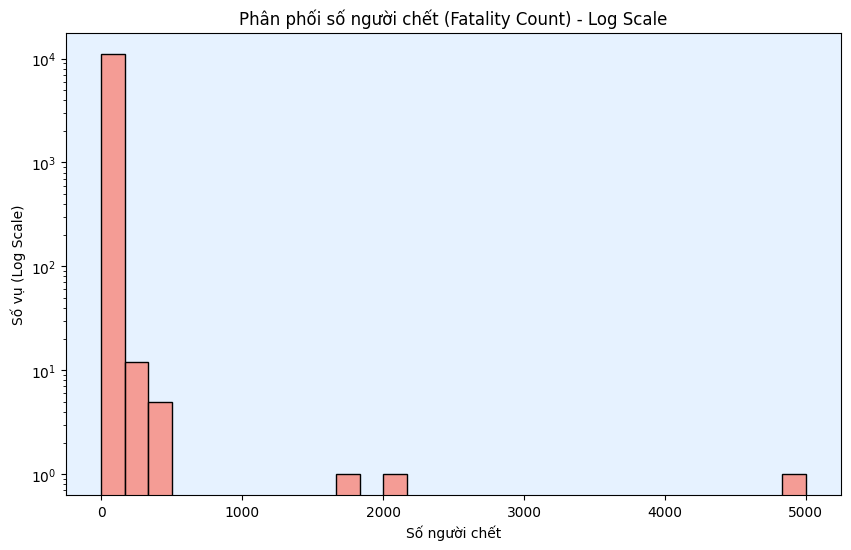

In [33]:
print(df['fatality_count'].describe())

plt.figure(figsize=(10, 6))
# Dùng log scale cho trục Y vì dữ liệu thường bị lệch (skewed)
sns.histplot(df['fatality_count'], bins=30, kde=False, color='salmon')
plt.yscale('log')
plt.title('Phân phối số người chết (Fatality Count) - Log Scale')
plt.xlabel('Số người chết')
plt.ylabel('Số vụ (Log Scale)')
# plt.savefig('eda_fatality_dist.png')


Phân phối số vụ theo mức độ nghiêm trọng:
fatality_class
no_fatalities        8556
minor_incident       2064
moderate_incident     381
serious_disaster       29
major_catastrophe       3
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\215811195.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




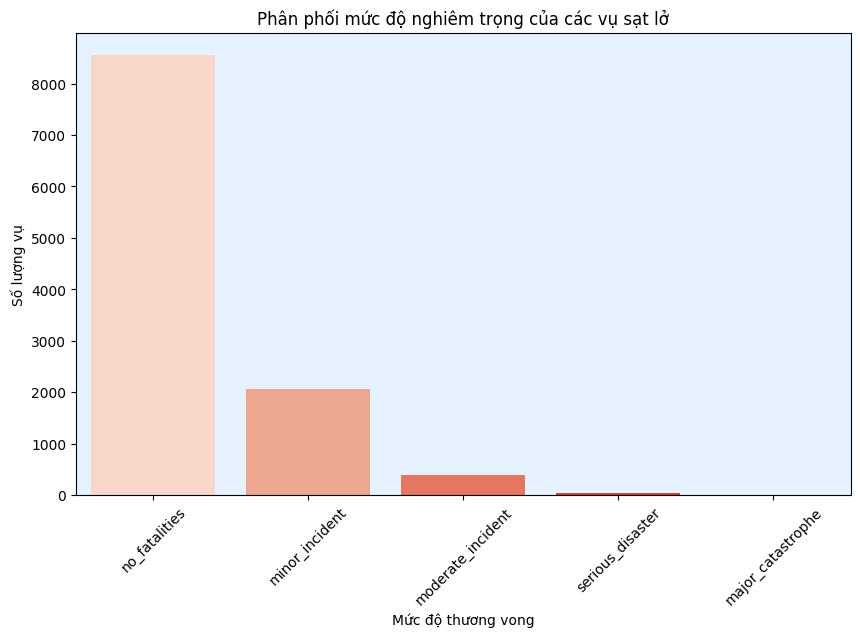

In [34]:
# 1. Áp dụng hàm phân loại
df['fatality_class'] = df['fatality_count'].apply(dp.categorize_fatality)

# 2. Chuyển sang kiểu dữ liệu Category có thứ tự (Ordinal) để vẽ biểu đồ cho đúng thứ tự
# Định nghĩa thứ tự
fatality_order = [
    'no_fatalities', 
    'minor_incident', 
    'moderate_incident', 
    'serious_disaster', 
    'major_catastrophe'
]

# Ép kiểu category
df['fatality_class'] = pd.Categorical(df['fatality_class'], categories=fatality_order, ordered=True)

# 3. Kiểm tra kết quả phân phối
print("\nPhân phối số vụ theo mức độ nghiêm trọng:")
print(df['fatality_class'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fatality_class', palette='Reds')
plt.title('Phân phối mức độ nghiêm trọng của các vụ sạt lở')
plt.xlabel('Mức độ thương vong')
plt.ylabel('Số lượng vụ')
plt.xticks(rotation=45)
plt.show()


=== THỐNG KÊ MÔ TẢ: INJURY_COUNT ===
count    11033.000000
mean         0.668812
std         12.049420
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        824.000000
Name: injury_count, dtype: float64

- Số vụ KHÔNG có người bị thương: 10340 vụ (93.72%)
- Ngưỡng 1% các vụ nghiêm trọng nhất (99th percentile): > 9 người bị thương
- Vụ cao nhất lịch sử trong dataset: 824 người bị thương


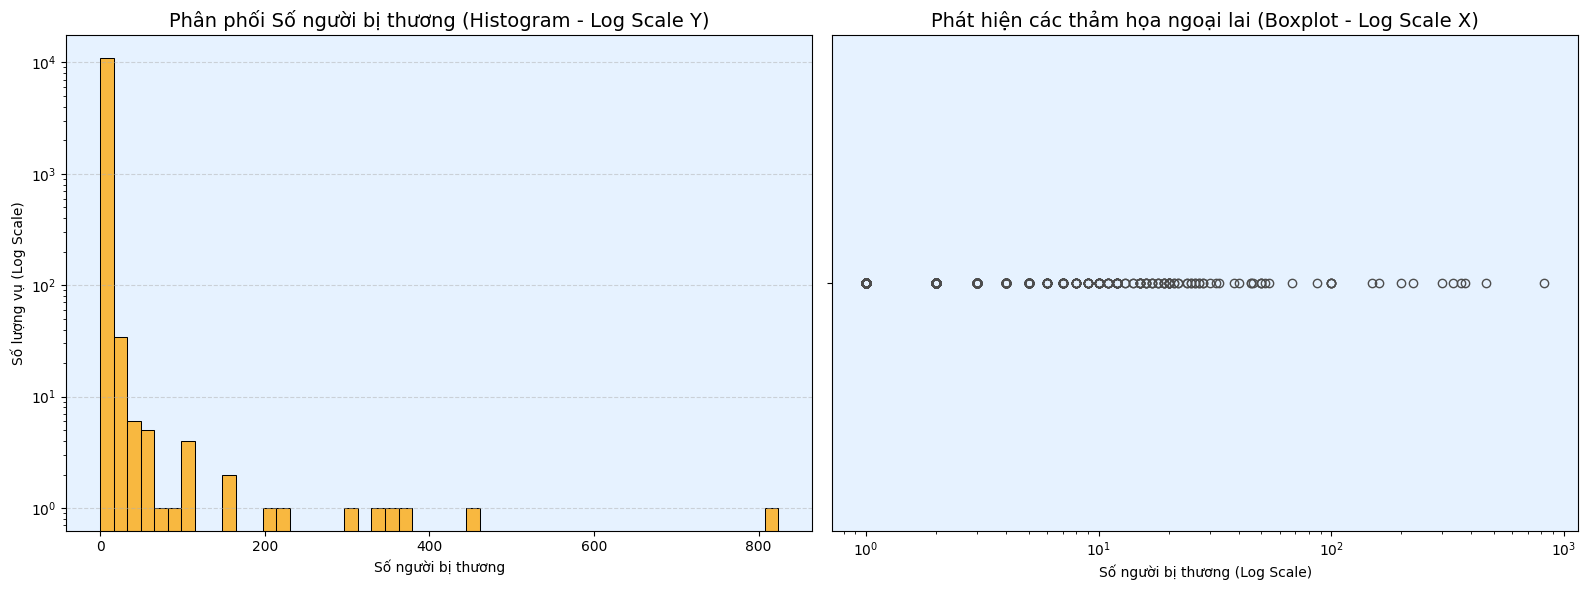


--- PHÂN PHỐI THEO NHÓM (CLASS) ---
injury_count
No Injury    10340
Minor          598
Moderate        77
Severe          18
Name: count, dtype: int64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- BƯỚC 1: XỬ LÝ DỮ LIỆU (PREPROCESSING) ---
# Đảm bảo cột là dạng số, ép các giá trị lỗi thành NaN rồi điền 0
df['injury_count'] = pd.to_numeric(df['injury_count'], errors='coerce').fillna(0)

# --- BƯỚC 2: THỐNG KÊ SỐ LIỆU (STATISTICS) ---
print("=== THỐNG KÊ MÔ TẢ: INJURY_COUNT ===")
print(df['injury_count'].describe())

# Tính các chỉ số quan trọng
zero_injury = sum(df['injury_count'] == 0)
percent_zero = (zero_injury / len(df)) * 100
p99 = df['injury_count'].quantile(0.99)
max_injury = df['injury_count'].max()

print(f"\n- Số vụ KHÔNG có người bị thương: {zero_injury} vụ ({percent_zero:.2f}%)")
print(f"- Ngưỡng 1% các vụ nghiêm trọng nhất (99th percentile): > {p99:.0f} người bị thương")
print(f"- Vụ cao nhất lịch sử trong dataset: {max_injury:.0f} người bị thương")

# --- BƯỚC 3: TRỰC QUAN HÓA (VISUALIZATION) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Histogram (Phân phối tần suất)
# Dùng log_scale=True cho trục Y vì cột giá trị 0 quá cao
sns.histplot(df['injury_count'], bins=50, kde=False, color='orange', ax=axes[0])
axes[0].set_yscale('log') 
axes[0].set_title('Phân phối Số người bị thương (Histogram - Log Scale Y)', fontsize=14)
axes[0].set_xlabel('Số người bị thương')
axes[0].set_ylabel('Số lượng vụ (Log Scale)')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Boxplot (Phát hiện ngoại lai)
# Dùng log_scale cho trục X để nhìn rõ các điểm outlier xa tít tắp
sns.boxplot(x=df['injury_count'], color='cyan', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Phát hiện các thảm họa ngoại lai (Boxplot - Log Scale X)', fontsize=14)
axes[1].set_xlabel('Số người bị thương (Log Scale)')

plt.tight_layout()
plt.show()

# --- BƯỚC 4: (TÙY CHỌN) PHÂN LỚP INJURY ---
# Nếu bạn muốn tạo nhóm để dễ phân tích như Fatality
def categorize_injury(count):
    if count == 0: return 'No Injury'
    if count <= 10: return 'Minor'        # 1-10
    if count <= 50: return 'Moderate'     # 11-50
    return 'Severe'                       # > 50

print("\n--- PHÂN PHỐI THEO NHÓM (CLASS) ---")
print(df['injury_count'].apply(categorize_injury).value_counts())

## Landslide Trigger

In [36]:
trigger_counts = df['landslide_trigger'].value_counts()
print(trigger_counts)

landslide_trigger
downpour                   4680
rain                       2592
unknown                    1714
continuous rain             748
tropical cyclone            561
snowfall snowmelt           135
monsoon                     129
mining                       93
earthquake                   89
construction                 82
flooding                     75
no apparent trigger          44
freeze thaw                  41
other                        26
dam embankment collapse      12
leaking pipe                 10
volcano                       1
vibration                     1
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1421182660.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Số lượng vụ')

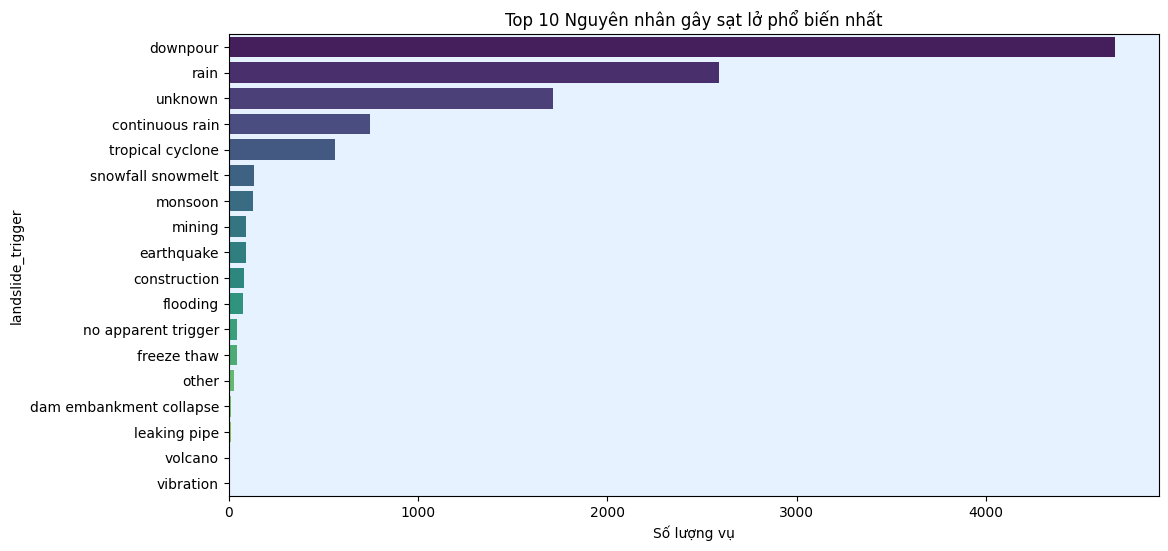

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=trigger_counts.values, y=trigger_counts.index, palette='viridis')
plt.title('Top 10 Nguyên nhân gây sạt lở phổ biến nhất')
plt.xlabel('Số lượng vụ')
# plt.savefig('eda_trigger_counts.png')

## Thống kê Loại sạt lở (Landslide Category)

In [38]:
category_counts = df['landslide_category'].value_counts()
print(category_counts)

landslide_category
landslide              7648
mudslide               2100
rock fall               671
complex                 232
debris flow             194
other                    68
unknown                  39
riverbank collapse       37
snow avalanche           15
translational slide       9
lahar                     7
earth flow                7
creep                     5
topple                    1
Name: count, dtype: int64


landslide_category
landslide              7648
mudslide               2100
rock fall               671
complex                 232
debris flow             194
other                    68
unknown                  39
riverbank collapse       37
snow avalanche           15
translational slide       9
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\406696662.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Số lượng vụ')

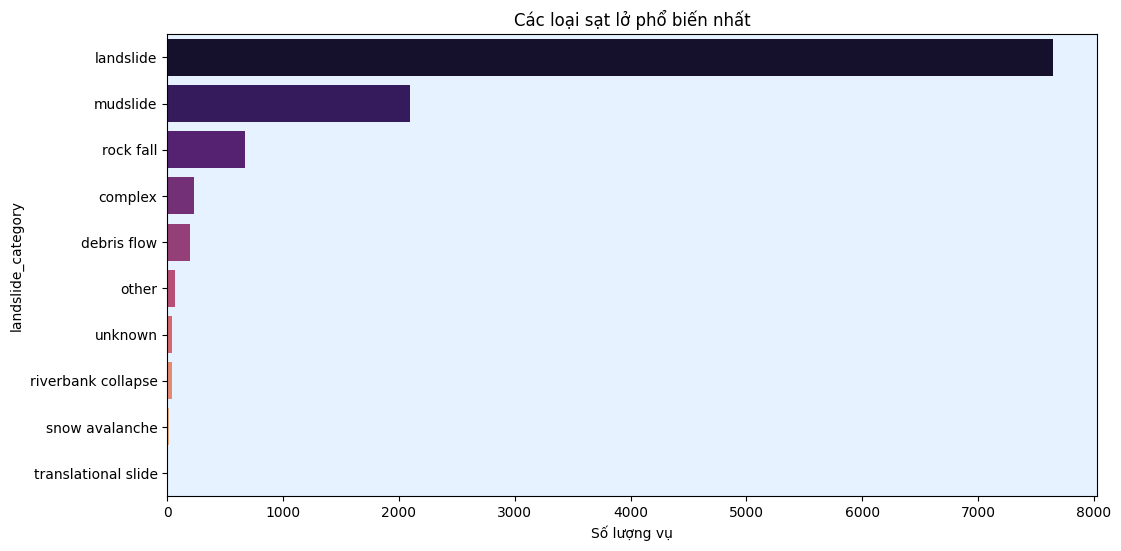

In [39]:
category_counts = df['landslide_category'].value_counts().head(10)
print(category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')
plt.title('Các loại sạt lở phổ biến nhất')
plt.xlabel('Số lượng vụ')
# plt.savefig('eda_category_counts.png')

## (Country Name)

country_name
united states     3606
india             1502
philippines        728
nepal              546
china              465
indonesia          411
united kingdom     257
canada             241
brazil             218
malaysia           205
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3018252236.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Số lượng vụ')

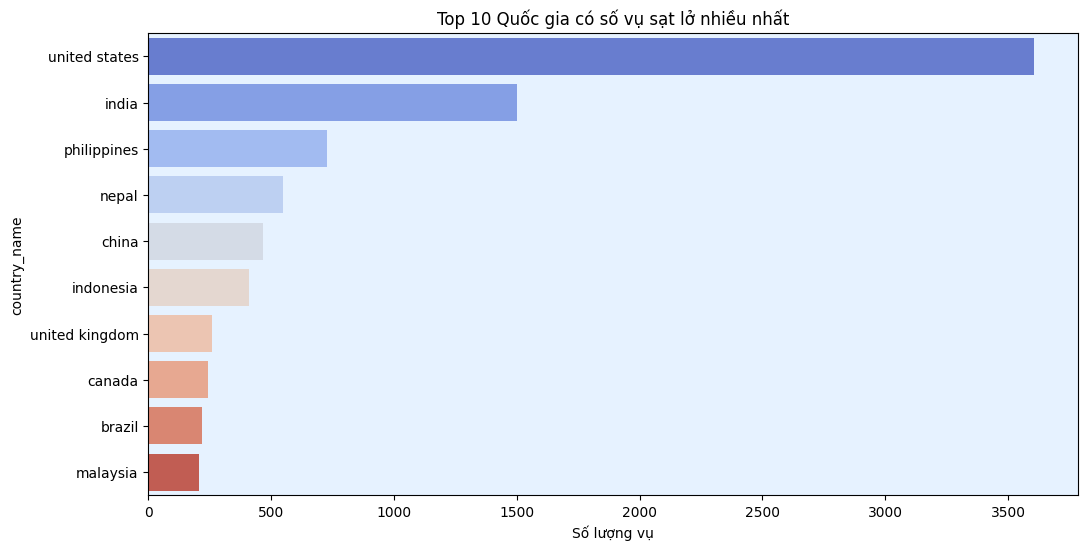

In [40]:
country_counts = df['country_name'].value_counts().head(10)
print(country_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title('Top 10 Quốc gia có số vụ sạt lở nhiều nhất')
plt.xlabel('Số lượng vụ')
# plt.savefig('eda_country_counts.png')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\384331152.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\384331152.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




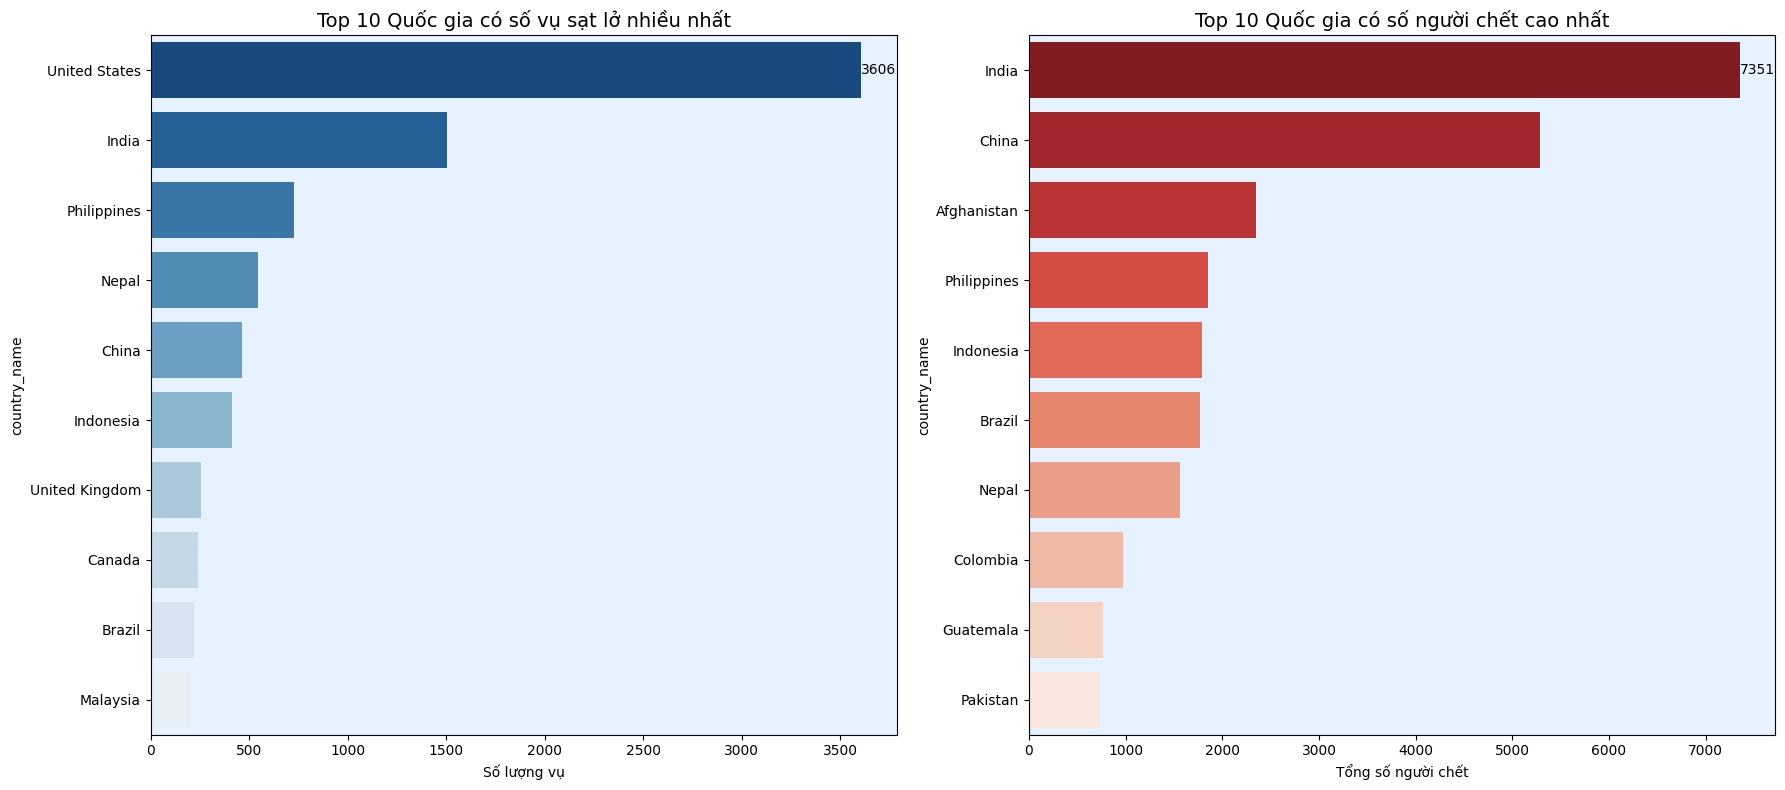

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Chuẩn hóa tên quốc gia (đề phòng viết hoa/thường lộn xộn)
df['country_name'] = df['country_name'].astype(str).str.lower().str.strip().str.title()

# Loại bỏ 'Unknown' nếu có
df_country = df[df['country_name'] != 'Unknown'].copy()

# 2. Tính toán thống kê
# Top 10 nước nhiều vụ nhất
top_freq = df_country['country_name'].value_counts().head(10)

# Top 10 nước nhiều người chết nhất
top_fatal = df_country.groupby('country_name')['fatality_count'].sum().sort_values(ascending=False).head(10)

# 3. Vẽ biểu đồ so sánh (Side-by-Side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Biểu đồ 1: Tần suất (Số lượng vụ) ---
sns.barplot(x=top_freq.values, y=top_freq.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Quốc gia có số vụ sạt lở nhiều nhất', fontsize=14)
axes[0].set_xlabel('Số lượng vụ')
axes[0].bar_label(axes[0].containers[0])

# --- Biểu đồ 2: Hậu quả (Số người chết) ---
sns.barplot(x=top_fatal.values, y=top_fatal.index, palette='Reds_r', ax=axes[1])
axes[1].set_title('Top 10 Quốc gia có số người chết cao nhất', fontsize=14)
axes[1].set_xlabel('Tổng số người chết')
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

In [42]:
df['event_date'] = pd.to_datetime(
    df['event_date'],
    errors='coerce'
)


In [43]:
# để làm sau đi
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
# df['hour'] = df['event_date'].dt.hour
df['day_of_year'] = df['event_date'].dt.dayofyear


=== THỐNG KÊ THỜI GIAN ===
Dữ liệu từ ngày: 1988-11-07 đến 2017-09-28
Tổng khoảng thời gian: 10552 ngày
Năm có nhiều sạt lở nhất: 2010 (1536 vụ)
Tháng 'đen tối' nhất trong năm: Tháng 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3616004688.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




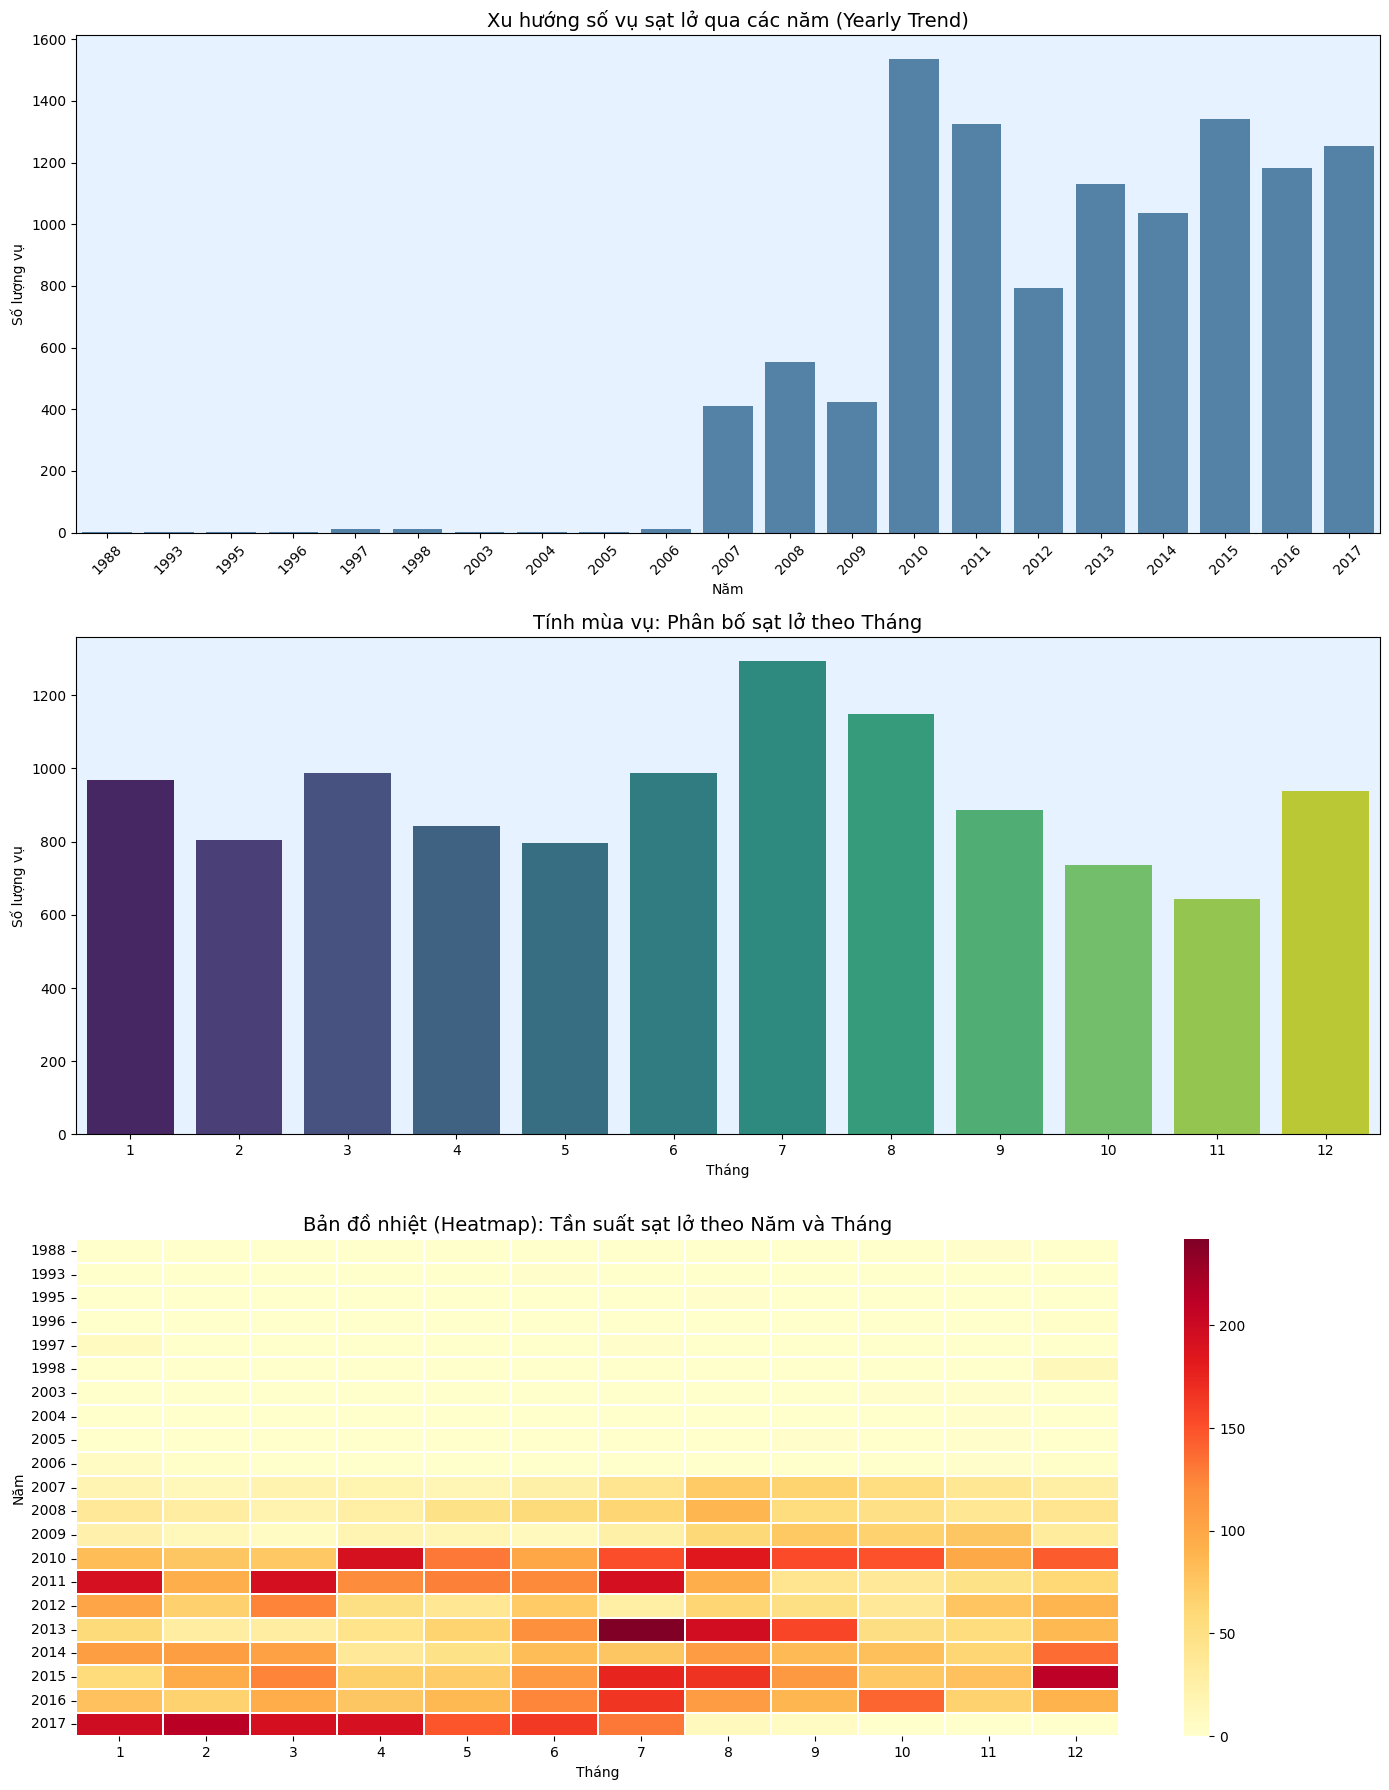

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- A. THỐNG KÊ CƠ BẢN ---
print("=== THỐNG KÊ THỜI GIAN ===")
print(f"Dữ liệu từ ngày: {df['event_date'].min().date()} đến {df['event_date'].max().date()}")
print(f"Tổng khoảng thời gian: {(df['event_date'].max() - df['event_date'].min()).days} ngày")
print(f"Năm có nhiều sạt lở nhất: {df['year'].mode()[0]} ({df['year'].value_counts().max()} vụ)")
print(f"Tháng 'đen tối' nhất trong năm: Tháng {df['month'].mode()[0]}")

# --- B. TRỰC QUAN HÓA ---
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Biểu đồ 1: Xu hướng theo Năm (Yearly Trend)
sns.countplot(data=df, x='year', color='steelblue', ax=axes[0])
axes[0].set_title('Xu hướng số vụ sạt lở qua các năm (Yearly Trend)', fontsize=14)
axes[0].set_ylabel('Số lượng vụ')
axes[0].set_xlabel('Năm')
axes[0].tick_params(axis='x', rotation=45) # Xoay nhãn năm cho dễ đọc

# Biểu đồ 2: Tính mùa vụ (Monthly Seasonality)
sns.countplot(data=df, x='month', palette='viridis', ax=axes[1])
axes[1].set_title('Tính mùa vụ: Phân bố sạt lở theo Tháng', fontsize=14)
axes[1].set_ylabel('Số lượng vụ')
axes[1].set_xlabel('Tháng')

# Biểu đồ 3: Heatmap (Năm vs Tháng) - Để nhìn mật độ
# Tạo bảng Pivot: Hàng là Năm, Cột là Tháng, Giá trị là Số vụ
pivot_table = df.groupby(['year', 'month']).size().unstack(fill_value=0)

sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.1, ax=axes[2])
axes[2].set_title('Bản đồ nhiệt (Heatmap): Tần suất sạt lở theo Năm và Tháng', fontsize=14)
axes[2].set_xlabel('Tháng')
axes[2].set_ylabel('Năm')

plt.tight_layout()
plt.show()

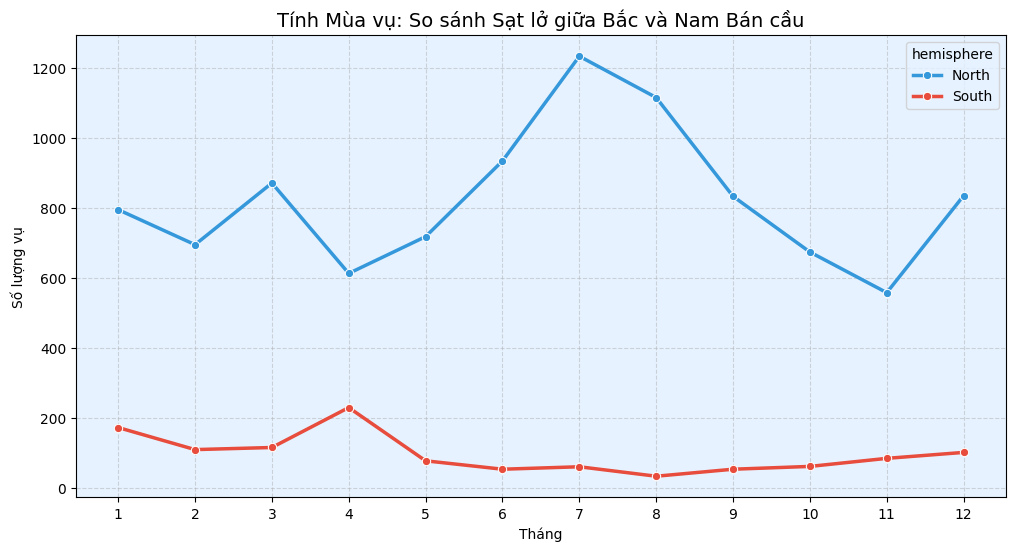

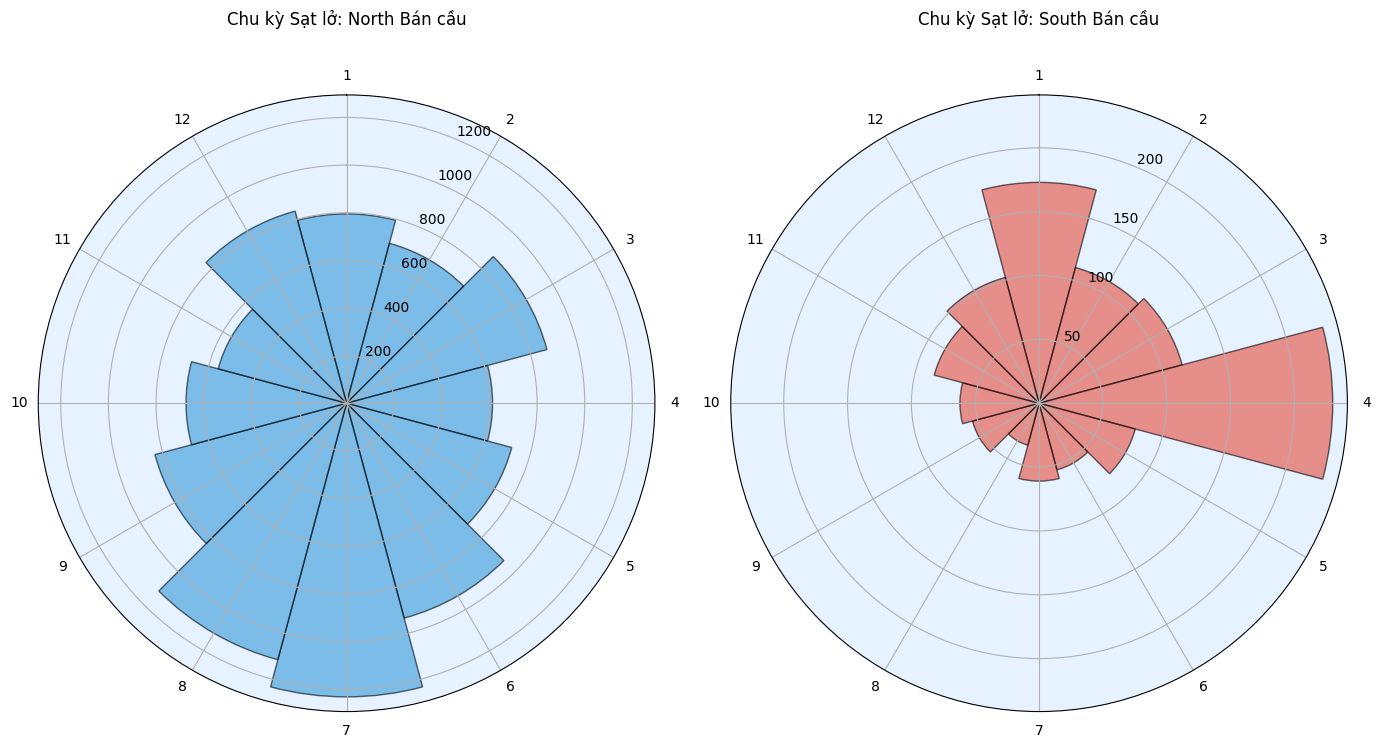

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === BƯỚC 1: TẠO CỘT BÁN CẦU (HEMISPHERE) ===
# Lat > 0 là Bắc, Lat < 0 là Nam
def get_hemisphere(lat):
    if pd.isna(lat) or lat == 0: return 'Unknown'
    return 'North' if lat > 0 else 'South'

df['hemisphere'] = df['latitude'].apply(get_hemisphere)

# Lọc bỏ Unknown để vẽ cho sạch
df_season = df[df['hemisphere'].isin(['North', 'South'])].copy()

# === BƯỚC 2: VẼ BIỂU ĐỒ SO SÁNH (LINE PLOT) ===
plt.figure(figsize=(12, 6))

# Đếm số vụ theo Tháng và Bán cầu
seasonal_data = df_season.groupby(['month', 'hemisphere']).size().reset_index(name='count')

sns.lineplot(
    data=seasonal_data, 
    x='month', 
    y='count', 
    hue='hemisphere', 
    marker='o',
    linewidth=2.5,
    palette={'North': '#3498db', 'South': '#e74c3c'} # Xanh cho Bắc, Đỏ cho Nam
)

plt.title('Tính Mùa vụ: So sánh Sạt lở giữa Bắc và Nam Bán cầu', fontsize=14)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(range(1, 13)) # Đảm bảo hiện đủ 12 tháng
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# === BƯỚC 3: BIỂU ĐỒ HOA HỒNG (POLAR CHART) - CỰC NGẦU ===
# Biểu đồ này giúp thấy rõ tính chu kỳ
def plot_polar_season(data, hemisphere_name, ax, color):
    # Đếm số vụ theo tháng (đảm bảo đủ 12 tháng kể cả tháng 0 vụ)
    counts = data[data['hemisphere'] == hemisphere_name]['month'].value_counts().sort_index()
    counts = counts.reindex(range(1, 13), fill_value=0)
    
    # Thiết lập góc (chia vòng tròn thành 12 phần)
    N = 12
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = counts.values
    width = 2 * np.pi / N
    
    # Cần xoay trục để tháng 1 nằm ở trên cùng (theo chiều kim đồng hồ)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    bars = ax.bar(theta, radii, width=width, bottom=0.0, color=color, alpha=0.6, edgecolor='black')
    ax.set_title(f'Chu kỳ Sạt lở: {hemisphere_name} Bán cầu', y=1.1, fontsize=12)
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1, 13)]) # Nhãn tháng 1-12

# Vẽ 2 biểu đồ Polar cạnh nhau
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122, projection='polar')

plot_polar_season(df_season, 'North', ax1, '#3498db') # Bắc màu Xanh
plot_polar_season(df_season, 'South', ax2, '#e74c3c') # Nam màu Đỏ

plt.tight_layout()
plt.show()

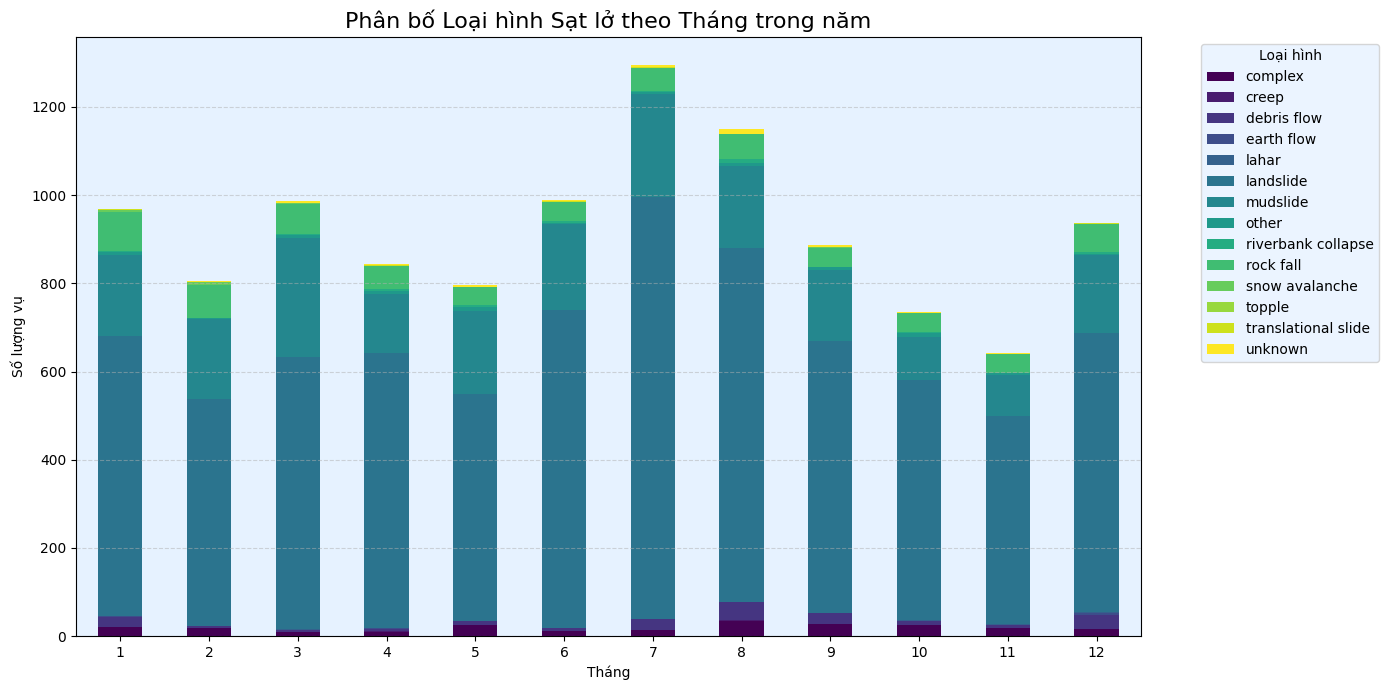

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === BƯỚC 1: CHUẨN BỊ DỮ LIỆU ===
# Lấy Top 5 loại sạt lở phổ biến nhất
top_cats = df['landslide_category'].value_counts().index

# Lọc dữ liệu
df_cat_month = df[df['landslide_category'].isin(top_cats)].copy()

# Tạo bảng chéo: Hàng là Tháng (1-12), Cột là Loại hình
ct_cat_month = pd.crosstab(df_cat_month['month'], df_cat_month['landslide_category'])

# === BƯỚC 2: VẼ BIỂU ĐỒ ===
# Vẽ Stacked Bar Chart
ax = ct_cat_month.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

plt.title('Phân bố Loại hình Sạt lở theo Tháng trong năm', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(rotation=0) # Để số tháng nằm ngang cho dễ đọc
plt.legend(title='Loại hình', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

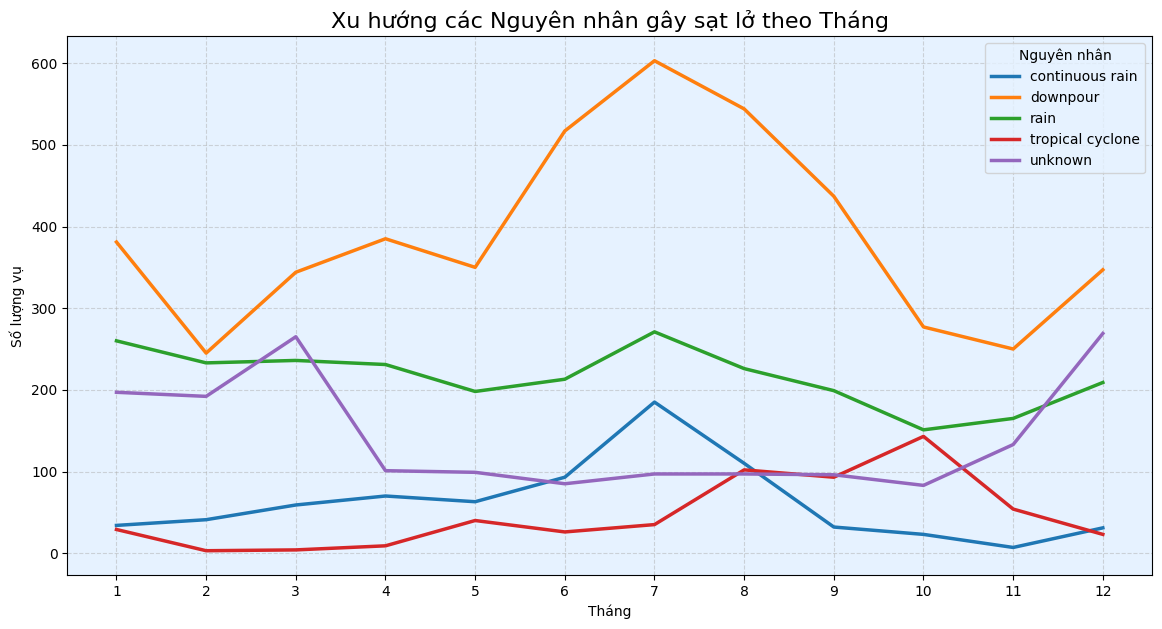

In [47]:
# === PHÂN TÍCH TRIGGER THEO THÁNG ===
# Lấy Top 5 nguyên nhân
top_triggers = df['landslide_trigger'].value_counts().head(5).index
df_trig_month = df[df['landslide_trigger'].isin(top_triggers)].copy()

# Tạo bảng chéo
ct_trig_month = pd.crosstab(df_trig_month['month'], df_trig_month['landslide_trigger'])

# Vẽ biểu đồ Line Plot (Dễ nhìn xu hướng hơn Bar)
plt.figure(figsize=(14, 7))
sns.lineplot(data=ct_trig_month, dashes=False, linewidth=2.5)

plt.title('Xu hướng các Nguyên nhân gây sạt lở theo Tháng', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Nguyên nhân')

plt.show()

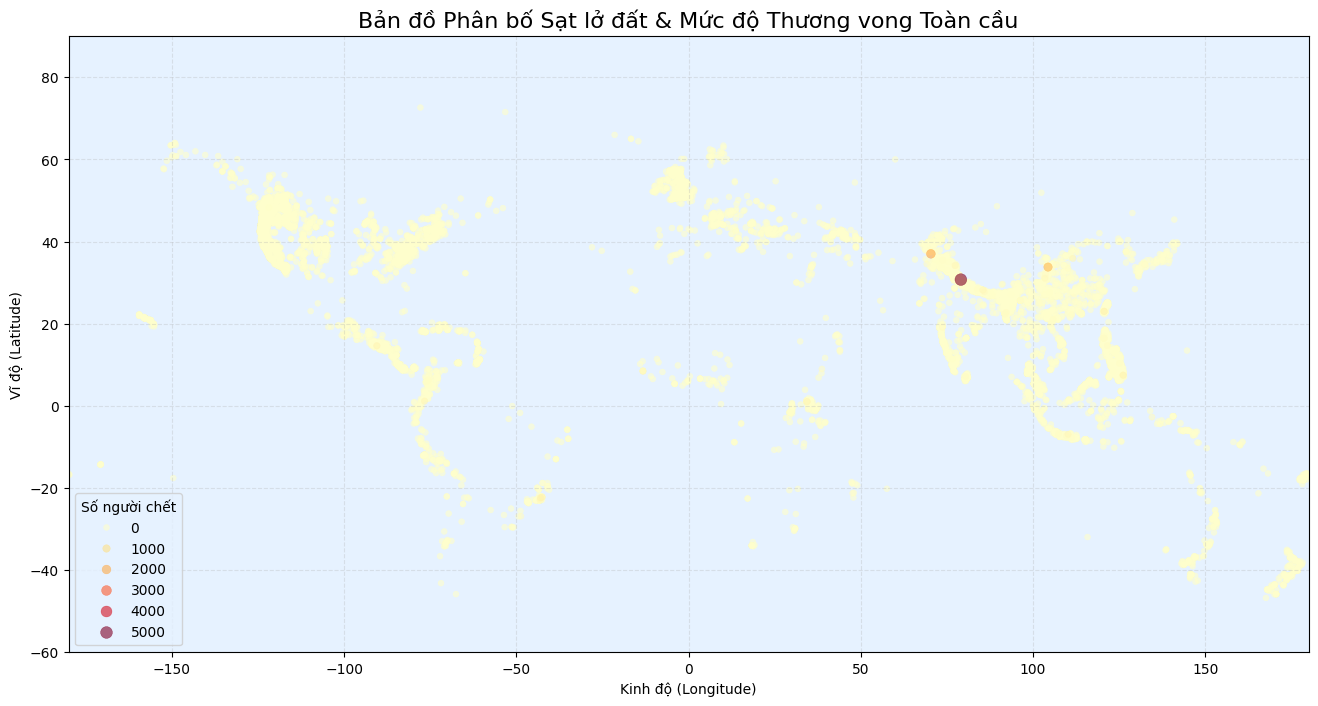

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu: Lọc bỏ toạ độ 0,0 và NaN
geo_df = df[(df['latitude'] != 0) & (df['longitude'] != 0) & 
            df['latitude'].notna() & df['longitude'].notna()].copy()

# Sắp xếp để các điểm màu đỏ (nguy hiểm) nằm đè lên trên các điểm màu nhạt
geo_df = geo_df.sort_values('fatality_count')

# 2. Vẽ Bản đồ Scatter Plot
plt.figure(figsize=(16, 8))

# Vẽ các điểm
sns.scatterplot(
    data=geo_df,
    x='longitude', 
    y='latitude',
    hue='fatality_count',      # Màu sắc theo số người chết
    size='fatality_count',     # Kích thước theo số người chết
    # sizes=(10, 300),           # Kích thước điểm từ nhỏ đến lớn
    palette='YlOrRd',          # Dải màu từ Vàng (nhẹ) sang Đỏ (nguy hiểm)
    alpha=0.6,                 # Độ trong suốt để nhìn thấy mật độ chồng lấn
    edgecolor=None
)

# Trang trí
plt.title('Bản đồ Phân bố Sạt lở đất & Mức độ Thương vong Toàn cầu', fontsize=16)
plt.xlabel('Kinh độ (Longitude)')
plt.ylabel('Vĩ độ (Latitude)')
plt.grid(True, linestyle='--', alpha=0.3) # Lưới mờ để dễ định vị
plt.legend(title='Số người chết', loc='lower left')

# Giới hạn trục để loại bỏ các điểm nhiễu quá xa (nếu có)
plt.xlim(-180, 180)
plt.ylim(-60, 90)

plt.show()

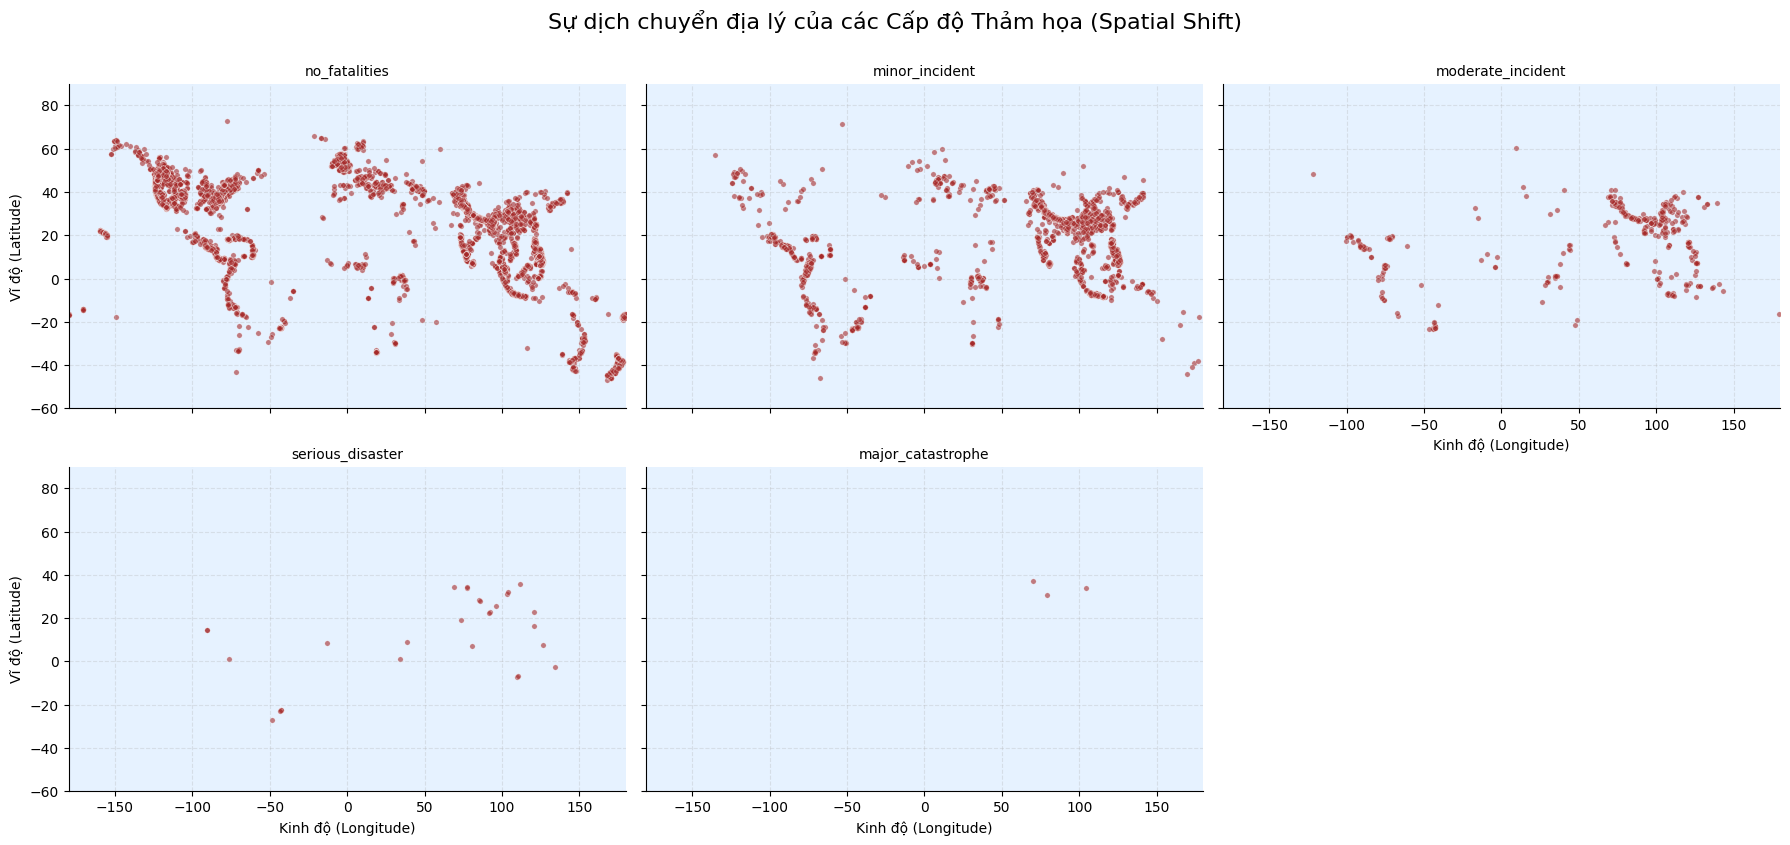

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
# Lọc toạ độ rác và đảm bảo thứ tự của Class
geo_df = df[(df['latitude'] != 0) & (df['longitude'] != 0)].copy()

# Định nghĩa thứ tự để vẽ từ Nhẹ -> Nặng
class_order = [
    'no_fatalities', 
    'minor_incident', 
    'moderate_incident', 
    'serious_disaster', 
    'major_catastrophe'
]

# 2. Vẽ FacetGrid (Lưới biểu đồ)
g = sns.FacetGrid(
    geo_df, 
    col='fatality_class',      # Tách cột theo Class
    col_order=class_order,     # Theo thứ tự mức độ
    col_wrap=3,                # Ngắt dòng sau mỗi 3 biểu đồ
    height=4, aspect=1.5,      # Kích thước mỗi biểu đồ con
    sharex=True, sharey=True   # Dùng chung trục toạ độ để dễ so sánh
)

# Vẽ điểm lên từng biểu đồ con
g.map(sns.scatterplot, 'longitude', 'latitude', alpha=0.6, s=15, color='brown')

# 3. Trang trí
g.fig.suptitle('Sự dịch chuyển địa lý của các Cấp độ Thảm họa (Spatial Shift)', fontsize=16, y=1.05)
g.set_axis_labels("Kinh độ (Longitude)", "Vĩ độ (Latitude)")
g.set_titles(col_template="{col_name}") # Đặt tên tiêu đề cho từng ô

# Vẽ đường nền biên giới thế giới (đơn giản hoá bằng grid) để dễ hình dung
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(-60, 90)
    ax.set_xlim(-180, 180)

plt.show()

landslide_size


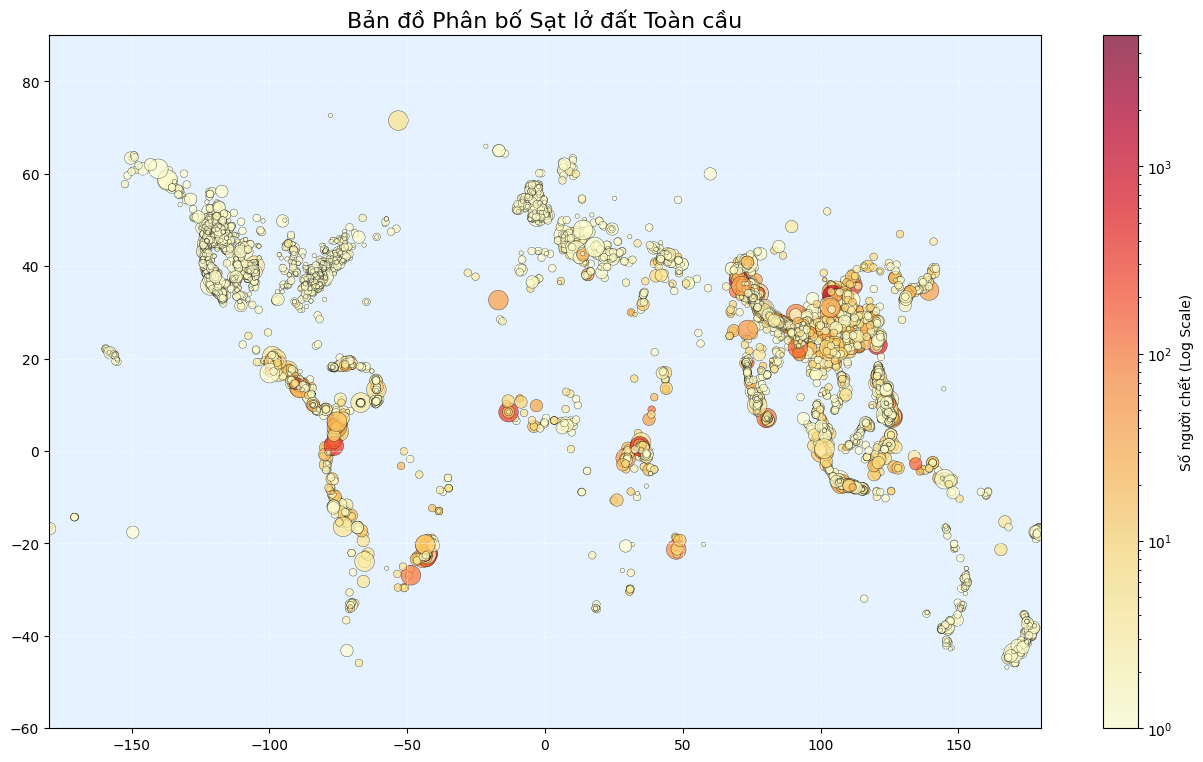

In [50]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Chuẩn bị dữ liệu kích thước điểm (Size)
size_mapping = {'small': 10, 'medium': 30, 'large': 80, 'very_large': 200}
df['plot_size'] = df['landslide_size'].map(size_mapping).fillna(10)
df['fatality_count'] = df['fatality_count'].fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(16, 9))
plt.rcParams['axes.facecolor'] = '#e6f2ff' # Màu xanh nhạt giả lập đại dương

scatter = plt.scatter(
    x=df['longitude'], 
    y=df['latitude'],
    c=df['fatality_count'] + 1, # Cộng 1 để tránh log(0)
    s=df['plot_size'],          # Kích thước theo quy mô
    cmap='YlOrRd',              # Màu từ Vàng -> Đỏ
    norm=LogNorm(),             # Dùng Log Scale cho màu sắc
    alpha=0.7,                  # Độ trong suốt
    edgecolors='k', linewidth=0.3
)

plt.colorbar(scatter, label='Số người chết (Log Scale)')
plt.title('Bản đồ Phân bố Sạt lở đất Toàn cầu', fontsize=16)
plt.xlim(-180, 180)
plt.ylim(-60, 90)
plt.grid(True, color='white', linestyle='--', alpha=0.5)
plt.show()

In [51]:
q3=df["admin_division_population"].quantile(0.75)
q1=df["admin_division_population"].quantile(0.15)
q2=(q3-q1)
foutlier_1=df[~((df["admin_division_population"]>(q3+1.5*q2)) | (df["admin_division_population"]<(q1-1.5*q2)))]



q3=foutlier_1["fatality_count"].quantile(0.85)
q1=foutlier_1["fatality_count"].quantile(0.25)
q2=(q3-q1)
foutlier_2=foutlier_1[~((foutlier_1["fatality_count"]>(q3+1.5*q2)) | (foutlier_1["admin_division_population"]<(q1-1.5*q2)))]



# q3=foutlier_2["gazeteer_distance"].quantile(0.75)
# q1=foutlier_2["gazeteer_distance"].quantile(0.15)
# q2=(q3-q1)
# foutlier_3=foutlier_2[~((foutlier_2["gazeteer_distance"]>(q3+1.5*q2)) | (foutlier_2["gazeteer_distance"]<(q1-1.5*q2)))]

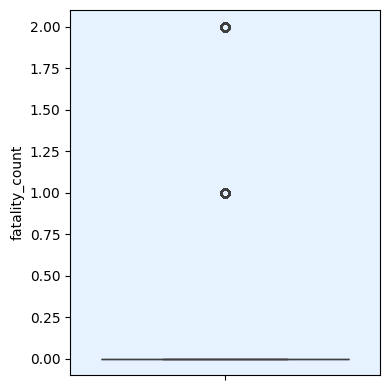

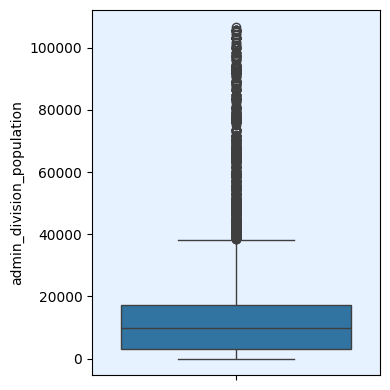

In [52]:
col=["fatality_count","admin_division_population"]

for i in col:
    plt.figure(figsize=(4,4))
    sns.boxplot(foutlier_2[i])
    plt.tight_layout()
    plt.show()

In [53]:
import plotly.express as px
fig=px.scatter_geo(df,lat='latitude',lon='longitude', color="fatality_count" , labels="landslide_size")
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1093612474.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1093612474.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




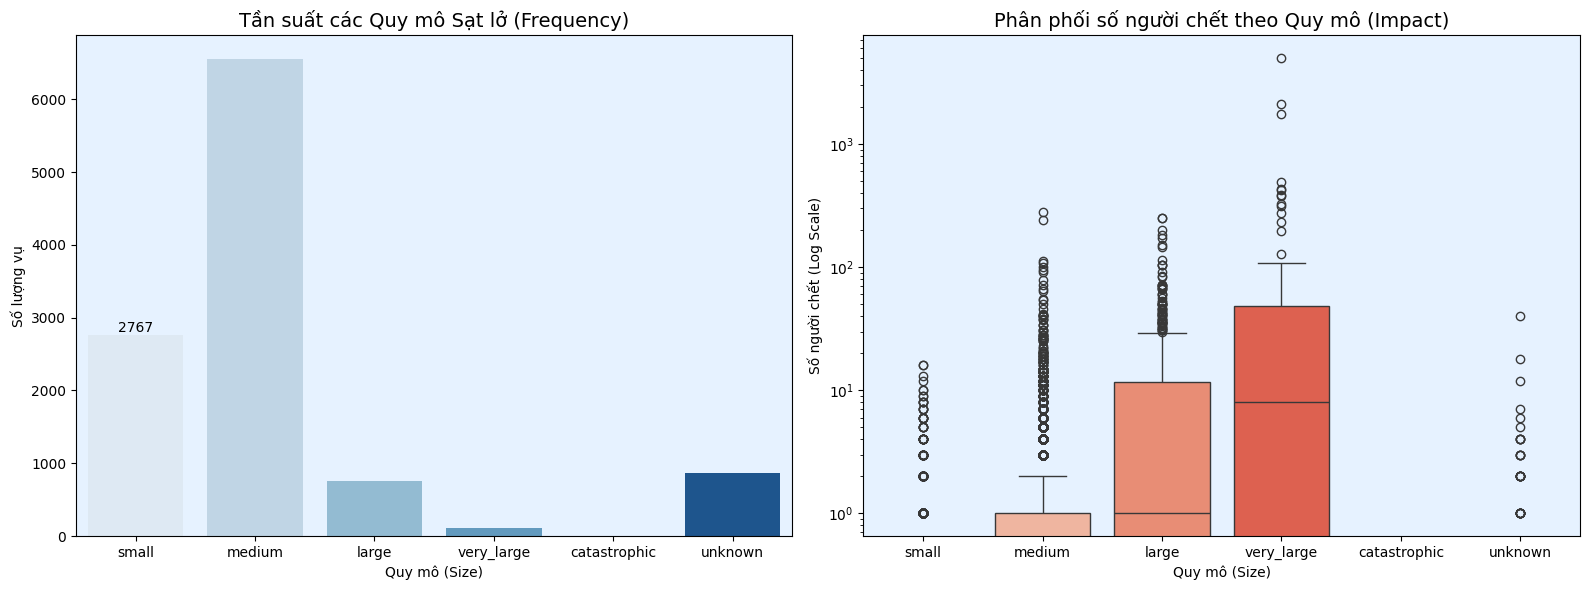

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu và Sắp xếp thứ tự (Mapping Order)
# Định nghĩa thứ tự từ bé đến lớn
size_order = ['small', 'medium', 'large', 'very_large', 'catastrophic', 'unknown']

# Lọc dữ liệu chỉ lấy các giá trị nằm trong danh sách trên (bỏ rác nếu có)
# Chuyển về lowercase để đồng nhất
df['landslide_size'] = df['landslide_size'].astype(str).str.lower().str.strip()
df_size = df[df['landslide_size'].isin(size_order)].copy()

# 2. Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Biểu đồ 1: Tần suất xuất hiện (Count Plot) ---
sns.countplot(
    data=df_size, 
    x='landslide_size', 
    order=size_order, 
    palette='Blues', 
    ax=axes[0]
)
axes[0].set_title('Tần suất các Quy mô Sạt lở (Frequency)', fontsize=14)
axes[0].set_xlabel('Quy mô (Size)')
axes[0].set_ylabel('Số lượng vụ')
axes[0].bar_label(axes[0].containers[0]) # Hiển thị số trên cột

# --- Biểu đồ 2: Tác động đến Thương vong (Box Plot) ---
# Dùng log scale trục Y vì số người chết chênh lệch lớn
sns.boxplot(
    data=df_size, 
    x='landslide_size', 
    y='fatality_count', 
    order=size_order, 
    palette='Reds', 
    ax=axes[1]
)
axes[1].set_yscale('log') # Quan trọng: Log scale để nhìn rõ sự khác biệt
axes[1].set_title('Phân phối số người chết theo Quy mô (Impact)', fontsize=14)
axes[1].set_xlabel('Quy mô (Size)')
axes[1].set_ylabel('Số người chết (Log Scale)')

plt.tight_layout()
plt.show()

landslide_setting

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\931088712.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




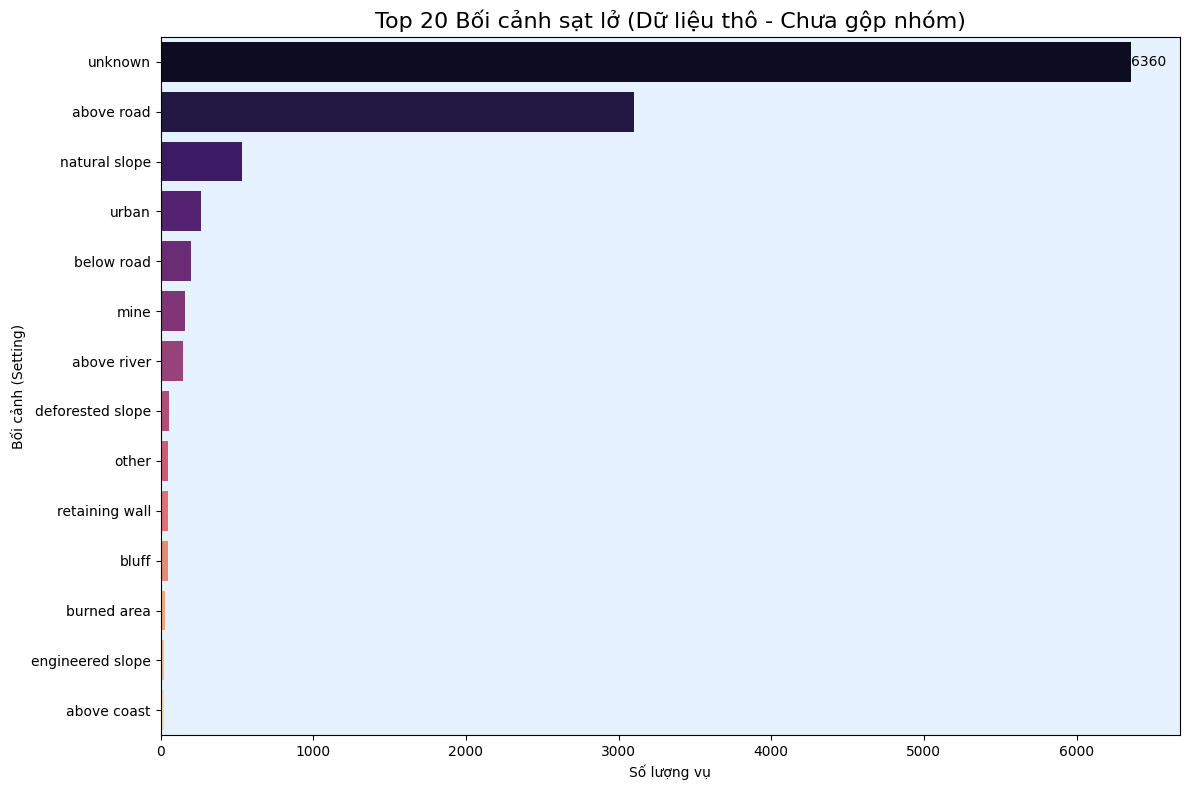

--- Danh sách Top 20 bối cảnh ---
landslide_setting_raw
unknown             6360
above road          3104
natural slope        531
urban                264
below road           199
mine                 157
above river          149
deforested slope      53
other                 50
retaining wall        48
bluff                 48
burned area           28
engineered slope      22
above coast           20
Name: count, dtype: int64


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu thô
# Chuyển về chữ thường và xóa khoảng trắng thừa để gộp các lỗi chính tả cơ bản (như 'Mine ' và 'mine')
# Nhưng KHÔNG gộp các từ đồng nghĩa (giữ nguyên road, highway, v.v...)
df['landslide_setting_raw'] = df['landslide_setting'].astype(str).str.lower().str.strip()

# Lấy Top 20 địa điểm xảy ra nhiều nhất
top_settings_count = df['landslide_setting_raw'].value_counts().head(20)

# 2. Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x=top_settings_count.values, 
    y=top_settings_count.index, 
    palette='magma'
)

# Trang trí
ax.set_title('Top 20 Bối cảnh sạt lở (Dữ liệu thô - Chưa gộp nhóm)', fontsize=16)
ax.set_xlabel('Số lượng vụ')
ax.set_ylabel('Bối cảnh (Setting)')
ax.bar_label(ax.containers[0]) # Hiện số trên cột

plt.tight_layout()
plt.show()

# In ra danh sách các giá trị để bạn soi kỹ hơn
print("--- Danh sách Top 20 bối cảnh ---")
print(top_settings_count)

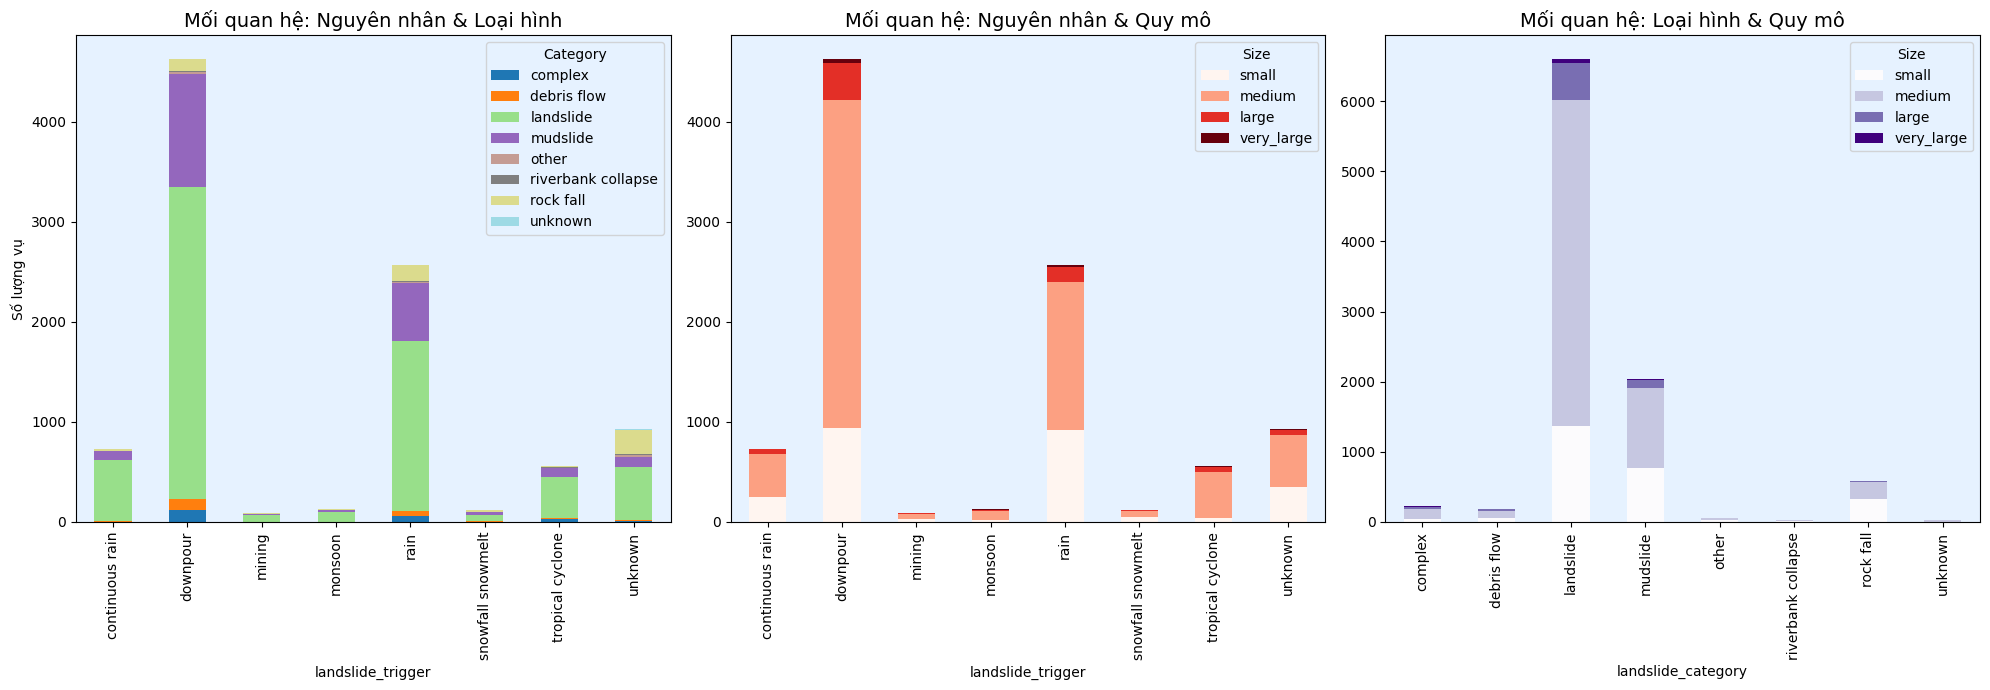

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === BƯỚC 1: CHUẨN BỊ DỮ LIỆU ===
# 1. Định nghĩa thứ tự cho Size (Quan trọng để biểu đồ có logic từ bé -> lớn)
size_order = ['small', 'medium', 'large', 'very_large']

# 2. Lọc lấy các giá trị phổ biến nhất (Top N) để biểu đồ gọn gàng
# Nếu để tất cả các loại trigger/category, biểu đồ sẽ rất rối
top_triggers = df['landslide_trigger'].value_counts().head(8).index
top_categories = df['landslide_category'].value_counts().head(8).index

# Tạo dataframe con chỉ chứa các top này
df_plot = df[
    (df['landslide_trigger'].isin(top_triggers)) & 
    (df['landslide_category'].isin(top_categories)) &
    (df['landslide_size'].isin(size_order))
].copy()

# === BƯỚC 2: VẼ BIỂU ĐỒ ===
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# --- PLOT 1: TRIGGER vs CATEGORY (Mưa gây ra loại gì?) ---
# Tạo bảng chéo
ct1 = pd.crosstab(df_plot['landslide_trigger'], df_plot['landslide_category'])
# Vẽ Stacked Bar
ct1.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Mối quan hệ: Nguyên nhân & Loại hình', fontsize=14)
axes[0].set_ylabel('Số lượng vụ')
axes[0].legend(title='Category', bbox_to_anchor=(1, 1))

# --- PLOT 2: TRIGGER vs SIZE (Nguyên nhân nào gây sạt lở to?) ---
ct2 = pd.crosstab(df_plot['landslide_trigger'], df_plot['landslide_size'])
# Sắp xếp lại các cột size theo thứ tự bé -> lớn
ct2 = ct2[size_order] 
ct2.plot(kind='bar', stacked=True, ax=axes[1], colormap='Reds')
axes[1].set_title('Mối quan hệ: Nguyên nhân & Quy mô', fontsize=14)
axes[1].legend(title='Size')

# --- PLOT 3: CATEGORY vs SIZE (Loại hình nào thường to?) ---
ct3 = pd.crosstab(df_plot['landslide_category'], df_plot['landslide_size'])
ct3 = ct3[size_order]
ct3.plot(kind='bar', stacked=True, ax=axes[2], colormap='Purples')
axes[2].set_title('Mối quan hệ: Loại hình & Quy mô', fontsize=14)
axes[2].legend(title='Size')

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1970268944.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1970268944.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




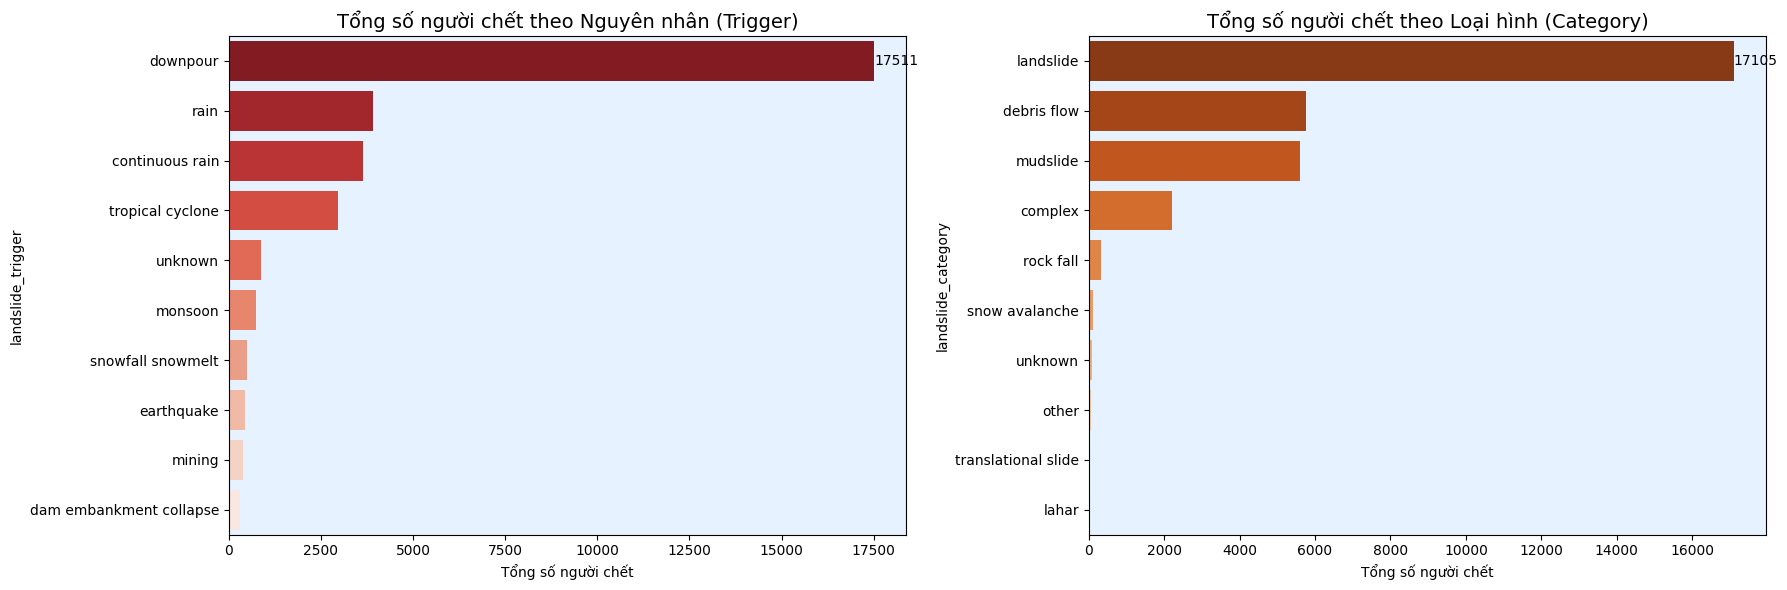

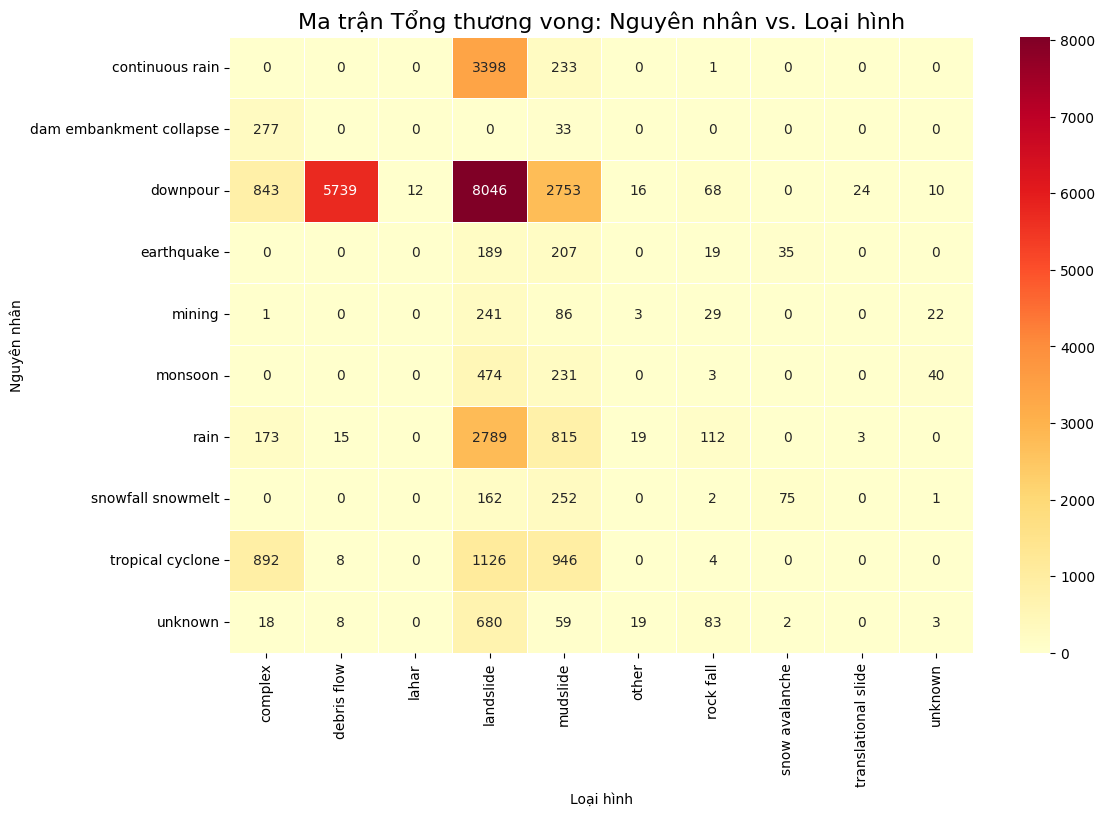

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Lấy Top 10 nguyên nhân và Top 10 loại hình phổ biến nhất để vẽ cho gọn
top_triggers = df.groupby('landslide_trigger')['fatality_count'].sum().sort_values(ascending=False).head(10).index
top_categories = df.groupby('landslide_category')['fatality_count'].sum().sort_values(ascending=False).head(10).index

# Lọc dữ liệu
df_top = df[
    (df['landslide_trigger'].isin(top_triggers)) & 
    (df['landslide_category'].isin(top_categories))
].copy()

# 2. Vẽ biểu đồ so sánh (Bar Charts)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Biểu đồ 1: Tổng số người chết theo NGUYÊN NHÂN ---
trigger_sum = df_top.groupby('landslide_trigger')['fatality_count'].sum().sort_values(ascending=False)
sns.barplot(x=trigger_sum.values, y=trigger_sum.index, palette='Reds_r', ax=axes[0])
axes[0].set_title('Tổng số người chết theo Nguyên nhân (Trigger)', fontsize=14)
axes[0].set_xlabel('Tổng số người chết')
axes[0].bar_label(axes[0].containers[0], fmt='%.0f') # Hiện số liệu

# --- Biểu đồ 2: Tổng số người chết theo LOẠI HÌNH ---
cat_sum = df_top.groupby('landslide_category')['fatality_count'].sum().sort_values(ascending=False)
sns.barplot(x=cat_sum.values, y=cat_sum.index, palette='Oranges_r', ax=axes[1])
axes[1].set_title('Tổng số người chết theo Loại hình (Category)', fontsize=14)
axes[1].set_xlabel('Tổng số người chết')
axes[1].bar_label(axes[1].containers[0], fmt='%.0f')

plt.tight_layout()
plt.show()

# --- BIỂU ĐỒ 3: MA TRẬN TỬ THẦN (HEATMAP) ---
# Trả lời câu hỏi: Sự kết hợp nào chết nhiều nhất?
pivot_fatal = df_top.pivot_table(
    index='landslide_trigger', 
    columns='landslide_category', 
    values='fatality_count', 
    aggfunc='sum', 
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_fatal, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Ma trận Tổng thương vong: Nguyên nhân vs. Loại hình', fontsize=16)
plt.ylabel('Nguyên nhân')
plt.xlabel('Loại hình')
plt.show()

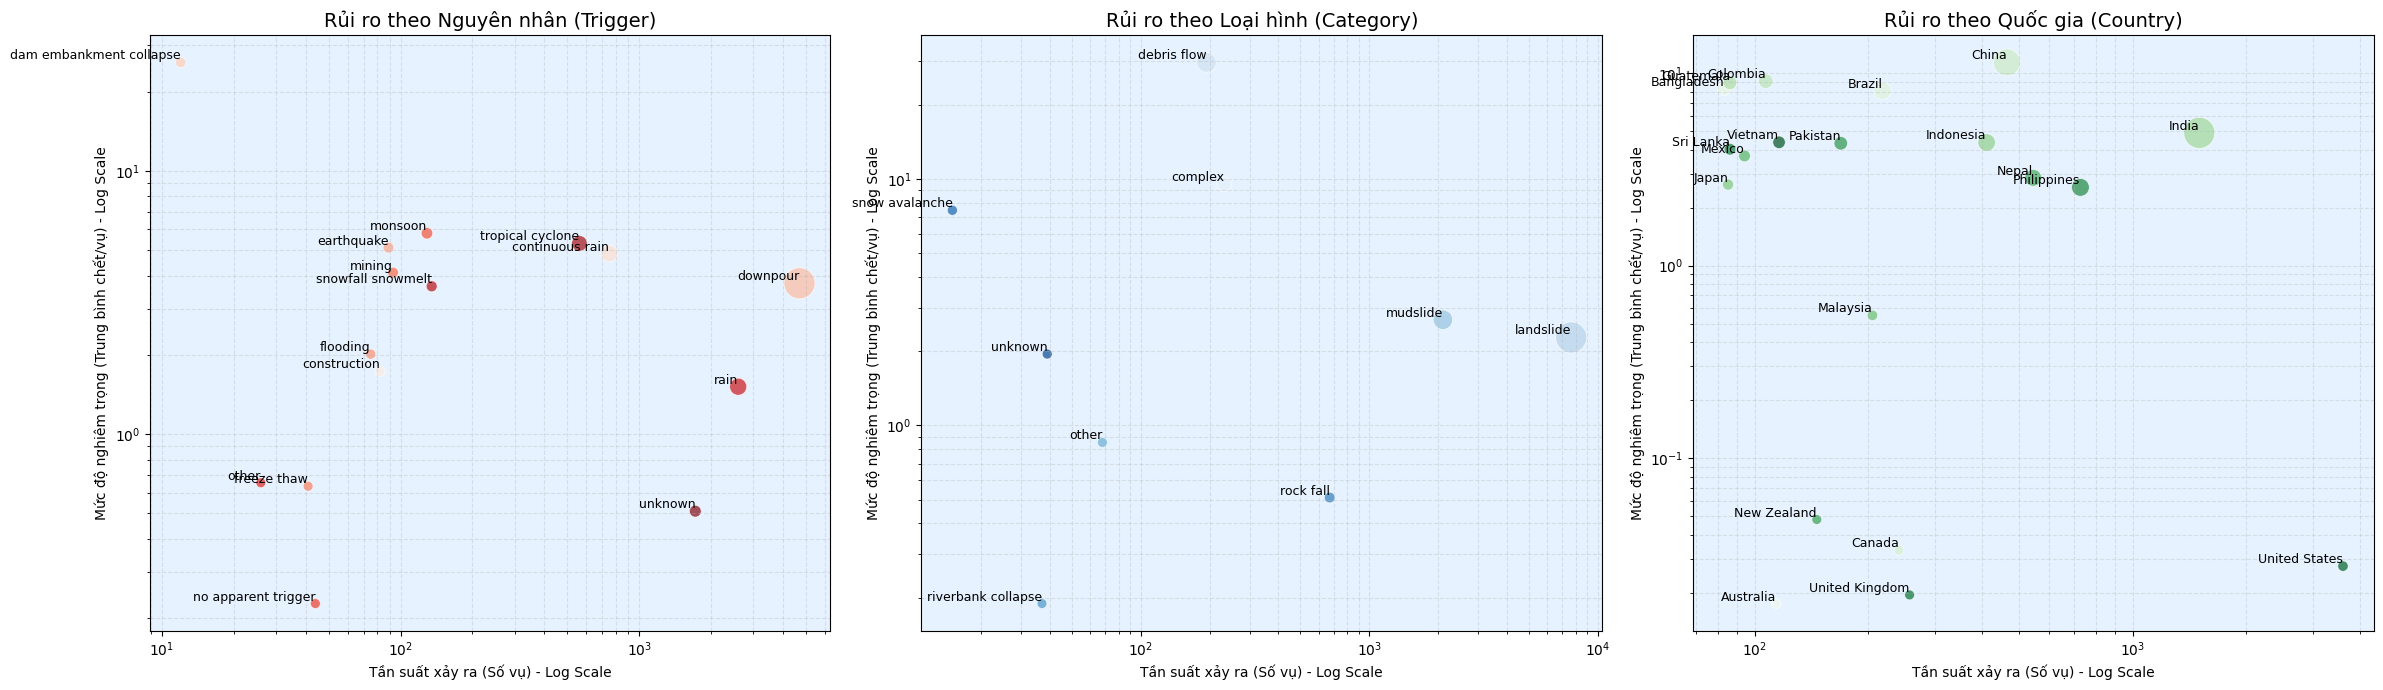

--- TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ) ---
              count       mean   sum
country_name                        
China           465  11.367742  5286
Colombia        107   9.074766   971
Guatemala        86   8.906977   766
Bangladesh       83   8.289157   688
Brazil          218   8.096330  1765
Taiwan           68   7.941176   540
India          1502   4.894141  7351
Vietnam         116   4.370690   507
Indonesia       411   4.360097  1792
Pakistan        169   4.319527   730


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Load Data (Giả lập hoặc load lại nếu cần, ở đây dùng biến df có sẵn trong môi trường)
# Đảm bảo fatality_count là số
df['fatality_count'] = pd.to_numeric(df['fatality_count'], errors='coerce').fillna(0)

# 2. Hàm vẽ biểu đồ "Tần suất vs. Mức độ nghiêm trọng" (Frequency vs. Severity)
def plot_risk_matrix(data, group_col, title, ax, color_palette='viridis'):
    # Tính toán thống kê
    stats = data.groupby(group_col)['fatality_count'].agg(['count', 'mean', 'sum']).reset_index()
    
    # Lọc bỏ các nhóm quá nhỏ (ví dụ < 10 vụ) để tránh nhiễu (outliers do mẫu nhỏ)
    stats = stats[stats['count'] >= 10]
    
    # Vẽ Scatter Plot
    sns.scatterplot(
        data=stats, 
        x='count', 
        y='mean', 
        size='sum',            # Kích thước chấm = Tổng số người chết
        sizes=(50, 500),       # Kích thước tối thiểu - tối đa
        hue=group_col,         # Màu sắc phân biệt
        palette=color_palette,
        legend=False,          # Tắt legend màu để đỡ rối, sẽ label trực tiếp
        alpha=0.7,
        ax=ax
    )
    
    # Gắn nhãn tên (Labeling) cho các điểm
    for i in range(stats.shape[0]):
        ax.text(
            stats.iloc[i]['count'], 
            stats.iloc[i]['mean'], 
            stats.iloc[i][group_col], 
            fontsize=9, 
            ha='right', 
            va='bottom'
        )
        
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Tần suất xảy ra (Số vụ) - Log Scale')
    ax.set_ylabel('Mức độ nghiêm trọng (Trung bình chết/vụ) - Log Scale')
    
    # Dùng Log Scale vì dữ liệu chênh lệch rất lớn
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--", alpha=0.3)

# 3. Vẽ 3 biểu đồ: Trigger, Category, Country
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Plot 1: Trigger (Nguyên nhân)
# Lấy các trigger chính
top_triggers = df['landslide_trigger'].value_counts().head(15).index
df_trigger = df[df['landslide_trigger'].isin(top_triggers)]
plot_risk_matrix(df_trigger, 'landslide_trigger', 'Rủi ro theo Nguyên nhân (Trigger)', axes[0], 'Reds')

# Plot 2: Category (Loại hình)
top_cats = df['landslide_category'].value_counts().head(10).index
df_cat = df[df['landslide_category'].isin(top_cats)]
plot_risk_matrix(df_cat, 'landslide_category', 'Rủi ro theo Loại hình (Category)', axes[1], 'Blues')

# Plot 3: Country (Quốc gia - Insight đặc biệt)
# Lấy Top 20 quốc gia nhiều vụ nhất để so sánh
top_countries = df['country_name'].value_counts().head(20).index
df_country = df[df['country_name'].isin(top_countries)]
plot_risk_matrix(df_country, 'country_name', 'Rủi ro theo Quốc gia (Country)', axes[2], 'Greens')

plt.tight_layout()
plt.show()

# 4. In ra bảng số liệu chi tiết cho Quốc gia (Để thấy rõ Rate)
print("--- TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ) ---")
country_stats = df.groupby('country_name')['fatality_count'].agg(['count', 'mean', 'sum'])
# Lọc các nước có ít nhất 50 vụ để đảm bảo ý nghĩa thống kê
country_stats = country_stats[country_stats['count'] >= 50].sort_values('mean', ascending=False)
print(country_stats.head(10))

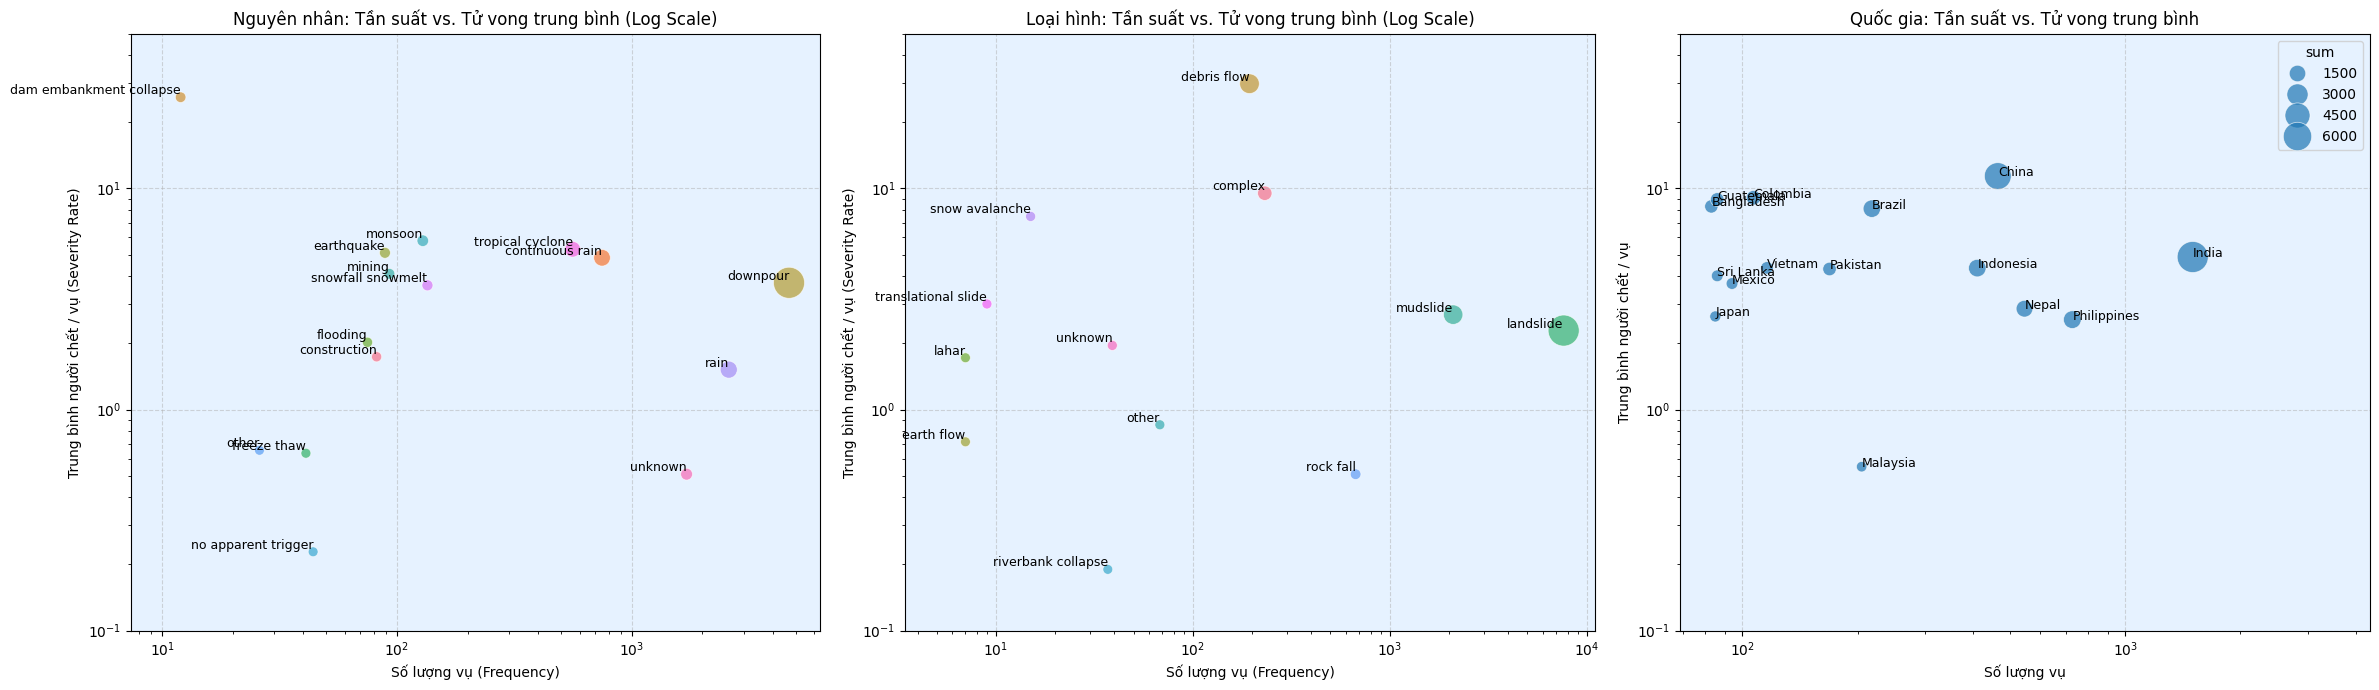

--- TOP 5 NGUYÊN NHÂN CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (trên mỗi vụ) ---
          landslide_trigger  count       mean
2   dam embankment collapse     12  25.833333
9                   monsoon    129   5.798450
14         tropical cyclone    561   5.304813
4                earthquake     89   5.112360
1           continuous rain    748   4.855615

--- TOP 5 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm nhiều vụ) ---
  country_name       mean  count
4        China  11.367742    465
5     Colombia   9.074766    107
6    Guatemala   8.906977     86
1   Bangladesh   8.289157     83
2       Brazil   8.096330    218


In [59]:
# === PHÂN TÍCH: TẦN SUẤT vs. MỨC ĐỘ NGHIÊM TRỌNG (FREQUENCY vs. SEVERITY) ===
def analyze_severity(group_col, title_prefix, ax):
    # 1. Tính toán thống kê
    stats = df.groupby(group_col)['fatality_count'].agg(['count', 'mean', 'sum', 'max']).reset_index()
    
    # Lọc bỏ các nhóm quá nhỏ (ít hơn 5 vụ) để tránh nhiễu
    stats = stats[stats['count'] >= 5]
    
    # 2. Vẽ Scatter Plot
    sns.scatterplot(
        data=stats,
        x='count',
        y='mean',
        size='sum',
        sizes=(50, 500),
        alpha=0.7,
        hue=group_col,
        legend=False,
        ax=ax
    )
    
    # Thêm nhãn cho các điểm
    # Chỉ thêm nhãn cho các điểm nằm trong giới hạn trục Y mới
    y_min, y_max = 0.1, 50 
    for i in range(stats.shape[0]):
        # Chỉ vẽ nhãn nếu điểm nằm trong khung hình (trục Y)
        if stats.iloc[i]['mean'] <= y_max and stats.iloc[i]['mean'] >= y_min:
            ax.text(
                stats.iloc[i]['count'], 
                stats.iloc[i]['mean'], 
                stats.iloc[i][group_col], 
                fontsize=9, 
                ha='right', 
                va='bottom'
            )
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'{title_prefix}: Tần suất vs. Tử vong trung bình (Log Scale)', fontsize=12)
    ax.set_xlabel('Số lượng vụ (Frequency)')
    ax.set_ylabel('Trung bình người chết / vụ (Severity Rate)')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # ÁP DỤNG FIX: Giới hạn trục Y ở mức 0.1 đến 50 người chết trung bình/vụ
    ax.set_ylim(y_min, y_max)

# Vẽ 3 biểu đồ: Trigger, Category, Country
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

analyze_severity('landslide_trigger', 'Nguyên nhân', axes[0])
analyze_severity('landslide_category', 'Loại hình', axes[1])

# Với Country, chỉ lấy Top 20 nước có nhiều vụ nhất để biểu đồ đỡ rối
top_countries = df['country_name'].value_counts().head(20).index
df_country_top = df[df['country_name'].isin(top_countries)]

# Tính toán stats_country và vẽ biểu đồ
stats_country = df_country_top.groupby('country_name')['fatality_count'].agg(['count', 'mean', 'sum']).reset_index()
sns.scatterplot(data=stats_country, x='count', y='mean', size='sum', sizes=(50, 500), alpha=0.7, ax=axes[2])

# Giới hạn trục Y cho Country
y_min_c, y_max_c = 0.1, 50 
for i in range(stats_country.shape[0]):
    if stats_country.iloc[i]['mean'] <= y_max_c and stats_country.iloc[i]['mean'] >= y_min_c:
        axes[2].text(stats_country.iloc[i]['count'], stats_country.iloc[i]['mean'], stats_country.iloc[i]['country_name'], fontsize=9)

axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Quốc gia: Tần suất vs. Tử vong trung bình', fontsize=12)
axes[2].set_xlabel('Số lượng vụ')
axes[2].set_ylabel('Trung bình người chết / vụ')
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_ylim(y_min_c, y_max_c) # ÁP DỤNG FIX cho country

plt.tight_layout()
plt.savefig('fatality_rate_analysis_fixed.png') # Đổi tên file để tránh nhầm lẫn
plt.show()

# In bảng thống kê "Top Deadliest Rates" (Top tỷ lệ tử vong cao nhất)
print("--- TOP 5 NGUYÊN NHÂN CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (trên mỗi vụ) ---")
# Lọc bỏ các nhóm nhỏ (<5 vụ) khỏi bảng này để thống kê có ý nghĩa
stats_trigger_all = df.groupby('landslide_trigger')['fatality_count'].agg(['count', 'mean']).reset_index()
stats_trigger_filtered = stats_trigger_all[stats_trigger_all['count'] >= 5]
print(stats_trigger_filtered.sort_values('mean', ascending=False).head(5))

print("\n--- TOP 5 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm nhiều vụ) ---")
print(stats_country.sort_values('mean', ascending=False)[['country_name', 'mean', 'count']].head(5))

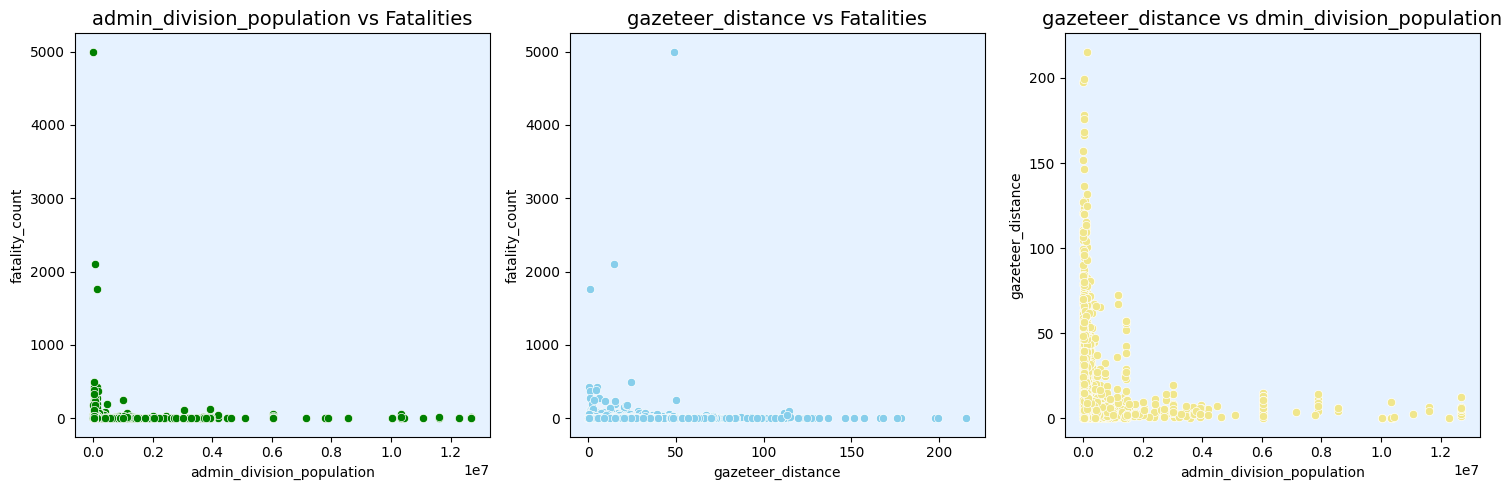

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(y='fatality_count', x='admin_division_population', data=df, color='green')
plt.title("admin_division_population vs Fatalities", fontdict={"fontsize":14})


plt.subplot(1,3,2)
sns.scatterplot(x='gazeteer_distance', y='fatality_count', data=df, color='skyblue')
plt.title("gazeteer_distance vs Fatalities", fontdict={"fontsize":14})


plt.subplot(1,3,3)
sns.scatterplot(y='gazeteer_distance', x='admin_division_population', data=df, color='khaki')
plt.title("gazeteer_distance vs dmin_division_population", fontdict={"fontsize":14})

plt.tight_layout()
plt.show()